------------------------------------------------------------------------
<center>

# Projeto AM-GRAD 2024.1

## Análise Renda Censitária
</center>

*Discentes:*

    *   Arthur Bezerra Calado
    *   Gabriel D'assumpção de Carvalho
    *   Pedro Henrique Sarmento de Paula

*Data:* 26/06/2024

------------------------------------------------------------------------

------------------------------------------------------------------------

# Introdução

O seguinte relatório vai estar utilizando a ([Base da Renda Censitária](https://archive.ics.uci.edu/dataset/2/adult)), a qual é multivariada e contém diversas variáveis que descrevem as características demográfica da população para prever se a renda excede US$ 50 mil por ano com base nos dados do censo. 


| Nome da variável   | Papel         | Tipo       | Demográfico         | Descrição             | Unidades | Valores ausentes |
|--------------------|---------------|------------|---------------------|-----------------------|----------|------------------|
| age              | Característica| Inteiro    | Idade               | N/A                   | -        | Não              |
| workclass    | Característica| Categórico | Rendimento          | Privado, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. | -        | Sim              |
| fnlwgt             | Característica| Inteiro    | -                   | -                     | -        | Não              |
| education           | Característica| Categórico | Nível de escolaridade | Bacharelado, Graduação, 11ª, HS-graduação, Prof-escola, Assoc-acdm, Assoc-voc, 9ª, 7ª-8ª, 12ª, Mestrado, 1ª-4ª, 10ª, Doutorado, 5ª-6ª, Pré-escola. | -        | Não              |
| education-num       | Característica| Inteiro    | Nível de escolaridade | -                     | -        | Não              |
| marital-status       | Característica| Categórico | Outro               | Casado-civ-cônjuge, Divorciado, Nunca casado, Separado, Viúvo, Casado-cônjuge-ausente, Casado-AF-cônjuge. | -        | Não              |
| occupation           | Característica| Categórico | Outro               | Suporte técnico, Reparo de artesanato, Outros serviços, Vendas, Exec-gerencial, Prof-especialidade, Manipuladores-limpadores, Máquina-op-inspct, Adm-clerical, Agricultura-pesca, Transporte-movimento, Priv-house-serv, Protetor-serv, Forças Armadas. | -        | Sim              |
| relationship            | Característica| Categórico | Outro               | Esposa, Próprio filho, Marido, Não familiar, Outro parente, Solteiro. | -        | Não              |
| race               | Característica| Categórico | Raça                | Branco, asiático-pac-ilhéu, amer-indiano-esquimó, outro, preto. | -        | Não              |
| sex               | Característica| Binário    | Sexo                | Feminino, Masculino.  | -        | Não              |
| capital-gain   | Característica| Inteiro    | -                   | -                     | -        | Não              |
| capital-loss   | Característica| Inteiro    | -                   | -                     | -        | Não              |
| hours-per-week   | Característica| Inteiro    | -                   | -                     | -        | Não              |
| native-country        | Característica| Categórico | Outro               | Estados Unidos, Camboja, Inglaterra, Porto Rico, Canadá, Alemanha, Outlying-US(Guam-USVI-etc), Índia, Japão, Grécia, Sul, China, Cuba, Irã, Honduras, Filipinas, Itália, Polônia, Jamaica, Vietnã, México, Portugal, Irlanda, França, República Dominicana, Laos, Equador, Taiwan, Haiti, Colômbia, Hungria, Guatemala, Nicarágua, Escócia, Tailândia, Iugoslávia, El Salvador, Trinadad&Tobago, Peru, Hong, Holanda-Holanda. | -        | Sim              |
| income         | Alvo          | Binário    | Rendimento          | >50K, <=50K.          | -        | Não              |


  A primeira parte deste relatório consistirá em uma análise exploratória dos dados, com o objetivo de compreender melhor as 15 variáveis. Serão apresentados detalhes como mínimo, máximo, média, mediana, variância, possíveis outliers, assimetria/simetria.

  Em seguida, avançaremos para a construção de 5 modelos de machine learning e deep learning, utilizando as seguintes técnicas:

  1) Árvore de Decisão (AD) 
  2) Support Vector Machines (SVM) 
  3) Redes Neurais Artificiais (RNA) 
  4) Randon Forest (RD) 
  5) Stacking Generalizarion (SG)
    
  A variável **income** será utilizada como a variável resposta/dependente (y), fornecendo dados sobre a renda do indivíduo.

# Biblioteca utilizadas

1) Pandas -> manipulação de dados;

2) numpy -> cálculos estatísticos;

4) matplotlib -> gráficos;

5) seaborn -> gráficos;

6) scipy -> transformação de variável;

7) warnings -> remoção de avisos;

8) sklearn -> modelos de machine e deep learning;

9) ucimlrepo -> importação do banco de dados

In [133]:
# Instalação das bibliotecas

# !pip3 install pandas
# !pip3 install matplotlib
# !pip3 install sklearn
# !pip3 install fsspec
# !pip3 install huggingface_hub
# !pip3 install seaborn
# !pip3 install ucimlrepo
# !pip3 install graphviz

In [134]:
import warnings
import pandas as pd
from ucimlrepo import fetch_ucirepo 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import matplotlib.colors as mcolors
from math import ceil
import numpy as np

In [135]:
#Desativa todos os avisos
warnings.filterwarnings("ignore")

# Importação dos dados

In [136]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 

# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets

In [137]:
# Verificando as 5 primeiras linhas de x e y
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [138]:
y.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


## Dados Faltantes
Conforme observado na tabela de explicação das variáveis, workclass, occupation e native-country contêm dados faltantes. Abaixo estão listadas as quantidades de observações ausentes para cada uma dessas variáveis.



In [139]:
len_x = {}
total_rows = len(X)
for n in X.columns:
    len_x[n] = [len(X[n].dropna())]
    len_x[n].append(total_rows - len_x[n][0])
len_x = pd.DataFrame.from_dict(len_x, orient='index', columns=['Nº Observacoes', 'Observacoes Faltantes'])
len_x

,Nº Observacoes,Observacoes Faltantes
age,48842,0
workclass,47879,963
fnlwgt,48842,0
education,48842,0
education-num,48842,0
marital-status,48842,0
occupation,47876,966
relationship,48842,0
race,48842,0
sex,48842,0


Acima podemos ver que workclass, occupation e native-country possuem 963, 966 e 274 dados faltantes respectivamente. 

# Análise Exploratória

## Variáveis Explicativas
Vamos realizar uma análise exploratória das variáveis explicativas do conjunto de dados. Abaixo estão as estatísticas descritivas e visualizações para cada variável.

### Age

In [140]:
X['age'].describe()

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [141]:
X['age'].mode()

0    36
Name: age, dtype: int64


Podemos observar as medidas da variável idade e notamos que a média é de aproximadamente 38,64 anos, com um desvio padrão de 13,71 anos, indicando que a maioria das pessoas tem idade entre 24,93 e 52,35 anos. Além disso, o valor mínimo é de 17 anos e o máximo de 90 anos. Observamos também que o primeiro quartil (Q1) é de 28 anos, a mediana (Q2) é de 37 anos e o terceiro quartil (Q3) é de 48 anos, mostrando que 50% da população tem entre 28 e 48 anos. A proximidade entre a mediana e a média, assim como a moda de 36 anos, sugere uma distribuição relativamente simétrica, embora haja uma leve assimetria positiva.

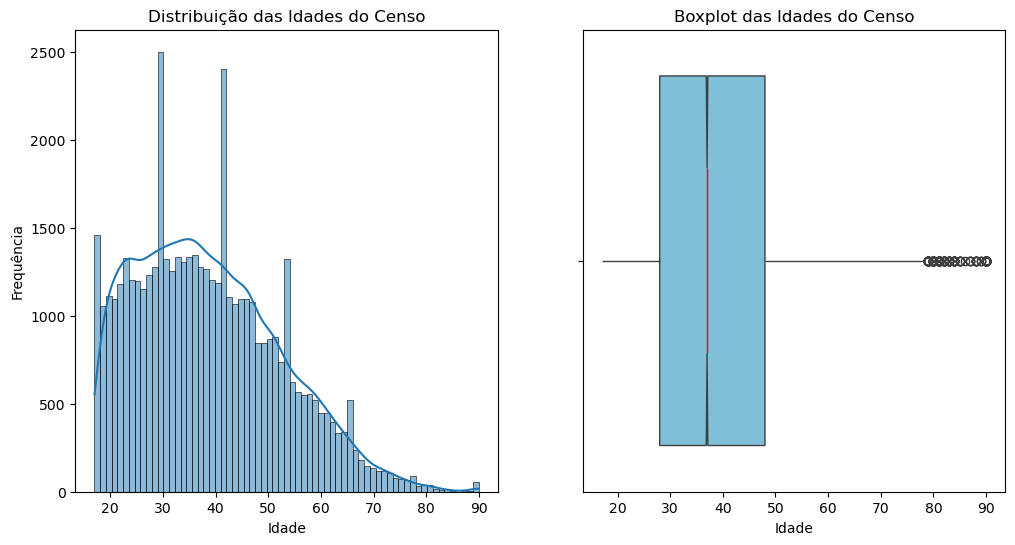

In [142]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(X["age"], kde=True)
plt.title("Distribuição das Idades do Censo")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.subplot(1, 2, 2)
sns.boxplot(X["age"], orient='h', notch=True, showcaps=False,
            boxprops={"facecolor": (0, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot das Idades do Censo")
plt.xlabel("Idade")
plt.show()

O gráfico da distribuição de idade é bastante interessante, pois reflete um padrão comum em populações. Observamos uma menor quantidade de jovens entre 15 e 25 anos, que tendem a se expor mais a riscos. À medida que as pessoas envelhecem, a busca por segurança aumenta, resultando em uma maior concentração de indivíduos em faixas etárias intermediárias. No entanto, na velhice, a taxa de sobrevivência diminui, o que causa uma queda na quantidade de pessoas, conferindo ao histograma um formato de montanha-russa. Além disso, este padrão pode indicar comportamentos e necessidades diferenciadas ao longo das etapas da vida, que são relevantes para estudos demográficos e estratégias de planejamento social.

### workclass

In [143]:
X['workclass'].describe()

count       47879
unique          9
top       Private
freq        33906
Name: workclass, dtype: object

Com base na descrição da variável "workclass", podemos observar que ela é do tipo categórica e possui 9 categorias distintas. A categoria mais comum é "Private", com 33.906 observações, representando aproximadamente 70,81% do total. Isso indica uma predominância significativa de empregos no setor privado entre as observações.

Também é importante frisar que essa variável possui 963 valores faltantes.

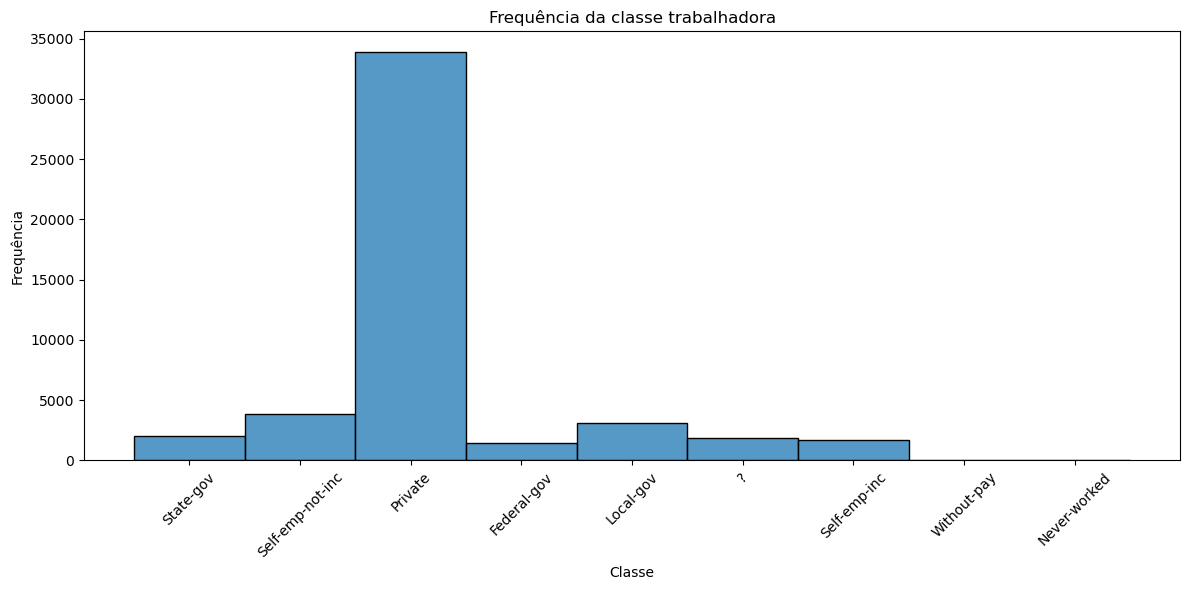

In [144]:
plt.figure(figsize=(12, 6))
sns.histplot(X["workclass"])
plt.title("Frequência da classe trabalhadora")
plt.xlabel("Classe")
plt.ylabel("Frequência")
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x em 45 graus
plt.tight_layout()  # Ajusta o layout para melhor visualização dos rótulos
plt.show()

Ao analisar o histograma, notamos a presença de uma categoria denominada "?". Após revisar a lista de categorias que a variável "workclass" pode assumir, planejamos uma etapa para lidar com as categorias desconhecidas nas variáveis categóricas e realizar transformações numéricas nas variáveis inteiras.

### Fnlwgt

In [145]:
X['fnlwgt'].describe()

count    4.884200e+04
mean     1.896641e+05
std      1.056040e+05
min      1.228500e+04
25%      1.175505e+05
50%      1.781445e+05
75%      2.376420e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

In [146]:
X['fnlwgt'].mode()

0    203488
Name: fnlwgt, dtype: int64

Ao analisar as estatísticas da variável "fnlwgt", observamos que a média é aproximadamente 189,664.1, com um desvio padrão de 105,604.0. Isso sugere que os valores estão centralizados em torno da média, embora haja uma dispersão considerável em relação a ela. A moda mais frequente para esta variável é 203,488, indicando que muitas observações têm pesos próximos a esse valor. Os dados variam de 12,285 (mínimo) a 1,490,400 (máximo), abrangendo uma ampla faixa de valores. Adicionalmente, notamos que 50% dos dados estão compreendidos entre o primeiro quartil (Q1) de 117,550.5 e o terceiro quartil (Q3) de 237,642.0.

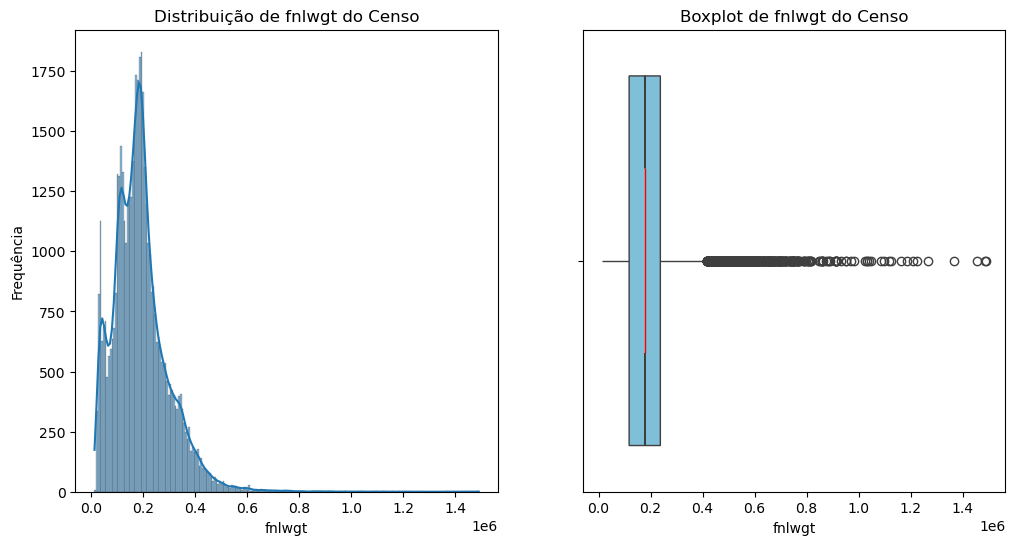

In [147]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(X["fnlwgt"], kde=True)
plt.title("Distribuição de fnlwgt do Censo")
plt.xlabel("fnlwgt")
plt.ylabel("Frequência")
plt.subplot(1, 2, 2)
sns.boxplot(X["fnlwgt"], orient='h', notch=True, showcaps=False,
            boxprops={"facecolor": (0, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot de fnlwgt do Censo")
plt.xlabel("fnlwgt")
plt.show()

Ao verificar o histograma da variável "fnlwgt", podemos observar uma assimetria positiva, indicando que há uma maior concentração de valores mais baixos e uma cauda estendida em direção aos valores mais altos. No entanto, ao analisar o boxplot, notamos que essa assimetria é influenciada pelos possíveis outliers, representados por pontos fora dos limites do "bigode" do boxplot. Apesar disso, a mediana está posicionada próxima ao centro da caixa, sugerindo uma distribuição centralizada em torno da medida central.

### Education

In [148]:
X['education'].describe()

count       48842
unique         16
top       HS-grad
freq        15784
Name: education, dtype: object

Analisando a descrição da variável de educação, observamos que a classe dominante é "HS-grad", com 15,784 observações, representando 32.32% do total de 48,842 observações.

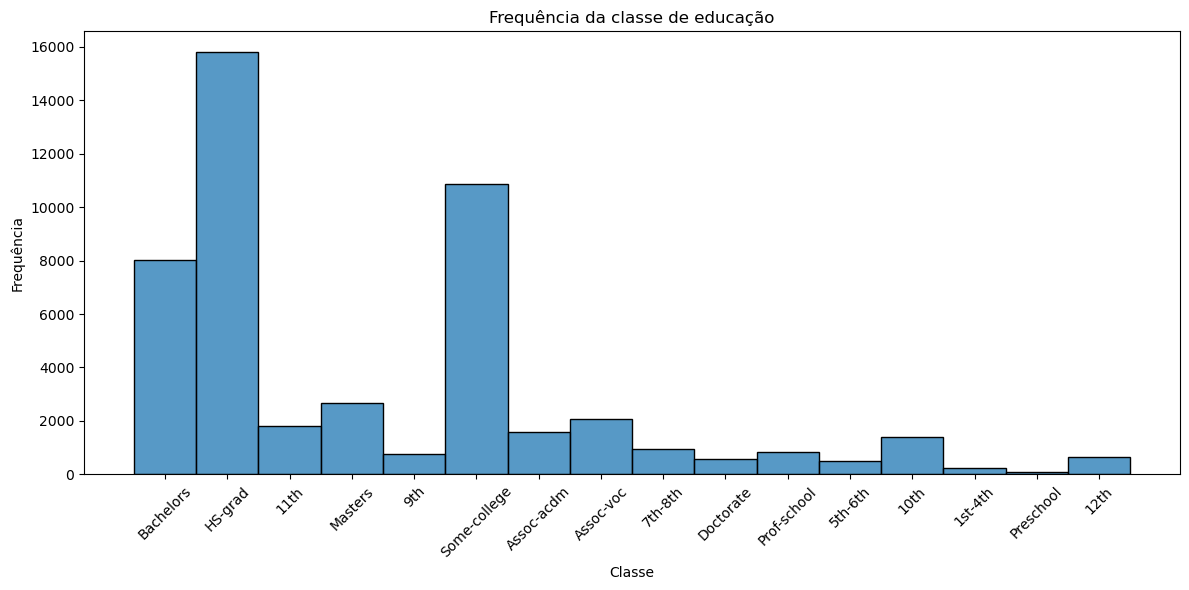

In [149]:
plt.figure(figsize=(12, 6))
sns.histplot(X["education"])
plt.title("Frequência da classe de educação")
plt.xlabel("Classe")
plt.ylabel("Frequência")
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x em 45 graus
plt.tight_layout()  # Ajusta o layout para melhor visualização dos rótulos
plt.show()


Analisando o histograma, podemos observar que as classes mais predominantes no banco de dados são "HS-grad", "Some-college" e "Bachelors". Essas categorias apresentam frequências significativamente maiores em relação às demais.

### Education-num

In [150]:
X['education-num'].describe()

count    48842.000000
mean        10.078089
std          2.570973
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64

In [151]:
X['education-num'].mode()

0    9
Name: education-num, dtype: int64

Ao verificar a tabela de descrição da variável "eductaion-num" podemos perceber que ela é uma variável categórica mas com representação numérica, tendo 16 categorias sendo elas a representação das categorias da variável "education" em forma númerica. Então podemos dizer que a moda e o primeiro quartil (Q1) que é de 9 representa a categoria "HS-grad"

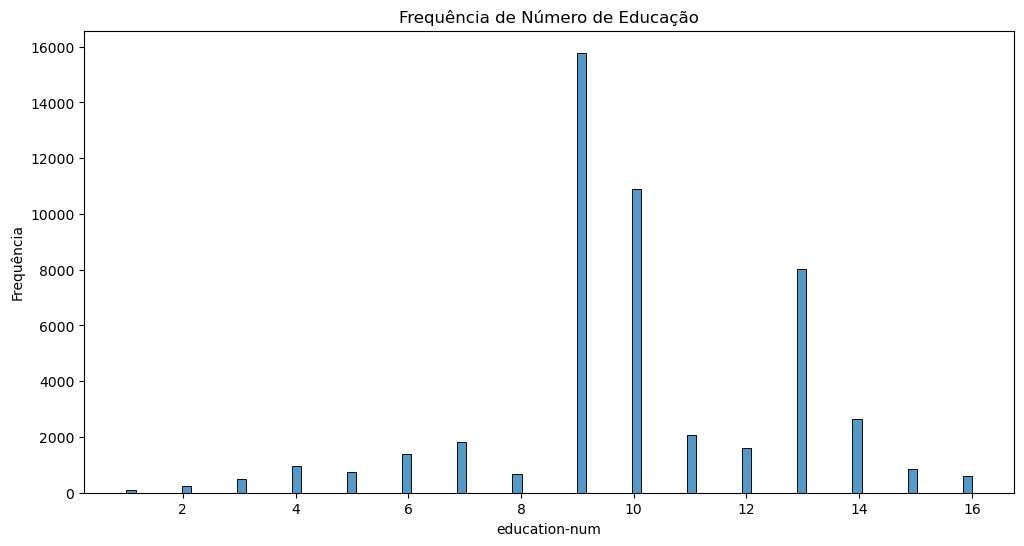

In [152]:
# Criação do grafico histograma para a variável 'fixed acidity'
plt.figure(figsize=(12, 6))
sns.histplot(X["education-num"])
plt.title("Frequência de Número de Educação")
plt.xlabel("education-num")
plt.ylabel("Frequência")
plt.show()

Podemos observar pelo histograma que a população incluída no censo possui um alto nível de escolaridade. Para explorar essa relação mais a fundo, poderíamos investigar quais países têm os níveis mais baixos e mais altos de escolaridade.

### Marital-status

In [153]:
X['marital-status'].describe()

count                  48842
unique                     7
top       Married-civ-spouse
freq                   22379
Name: marital-status, dtype: object

Ao analisar o resumo da variável "marital-status", observamos que existem 7 diferentes tipos de estado civil. A maior parte da população estudada é casada e vive com seu cônjuge, representando aproximadamente 45.82% do total de observações.

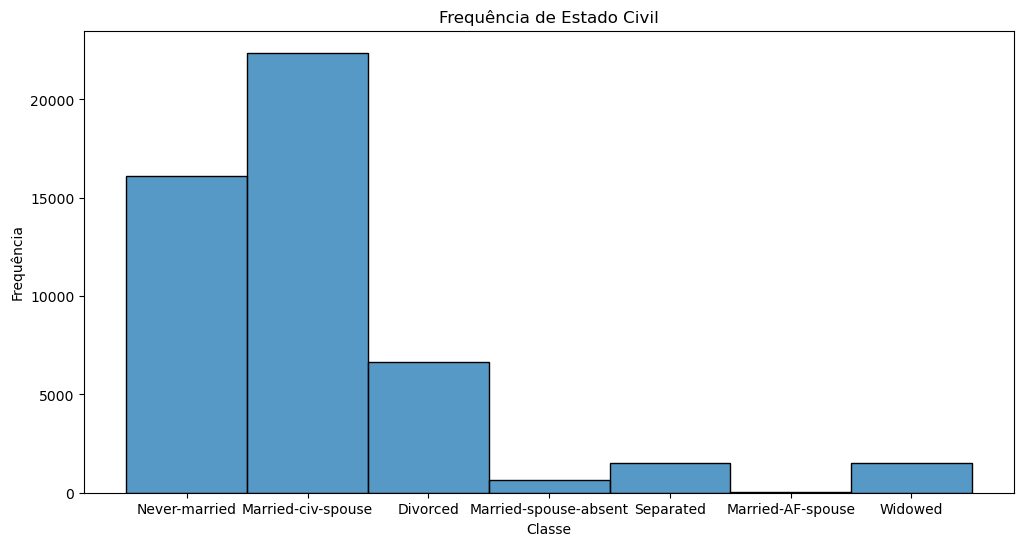

In [154]:
# Criação do grafico histograma para a variável 'fixed acidity'
plt.figure(figsize=(12, 6))
sns.histplot(X["marital-status"])
plt.title("Frequência de Estado Civil")
plt.xlabel("Classe")
plt.ylabel("Frequência")
plt.show()

Ao observar a frequência no histograma, identificamos que as classes predominantes são "Married-civ-spouse" (Casado com cônjuge civil), "Never-married" (Nunca casado) e "Divorced" (Divorciado).

### Occupation

In [155]:
X['occupation'].describe()

count              47876
unique                15
top       Prof-specialty
freq                6172
Name: occupation, dtype: object

In [156]:
6172/47876

0.12891636728214553

Pode-se observar que a variável "occupation" possui 15 diferentes classes, com a moda sendo a classe "Prof-specialty", que representa 12.89% do total do banco de dados. Além disso, conforme mencionado anteriormente, a variável "occupation" apresenta 966 dados faltantes.

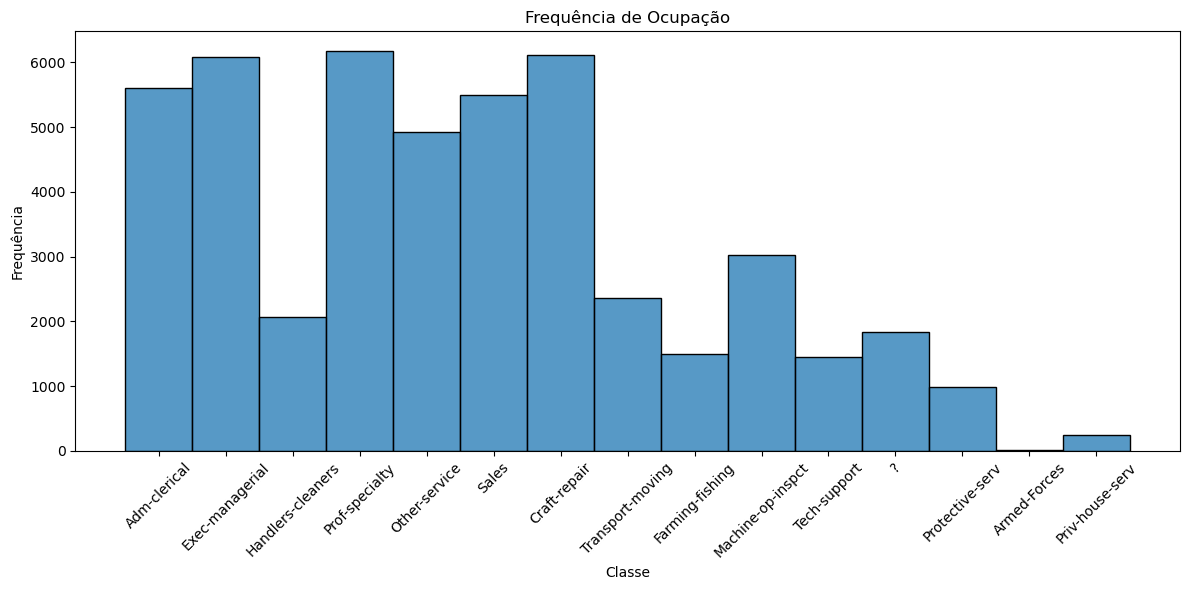

In [157]:
# Criação do grafico histograma para a variável 'fixed acidity'
plt.figure(figsize=(12, 6))
sns.histplot(X["occupation"])
plt.title("Frequência de Ocupação")
plt.xlabel("Classe")
plt.ylabel("Frequência")
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x em 45 graus
plt.tight_layout()  # Ajusta o layout para melhor visualização dos rótulos
plt.show()

Podemos ver no histograma que as ocupações profissionais da população são bastante heterogêneas. Também notamos que essa variável possui observações marcadas como "?", indicando que não foi possível determinar a ocupação no momento da coleta dos dados.

### Relationship

In [158]:
X['relationship'].describe()

count       48842
unique          6
top       Husband
freq        19716
Name: relationship, dtype: object

In [159]:
19716/48842

0.4036689734245117

Como observado anteriormente na variável "marital-status", a maior parte da população é casada. Consequentemente, a variável "relationship" apresenta a classe "Husband" (Marido) como a moda entre as 6 classes dessa variável, representando aproximadamente 40.37% de toda a amostra. Portanto, podemos concluir que a maioria das pessoas casadas que participaram da pesquisa são homens. 

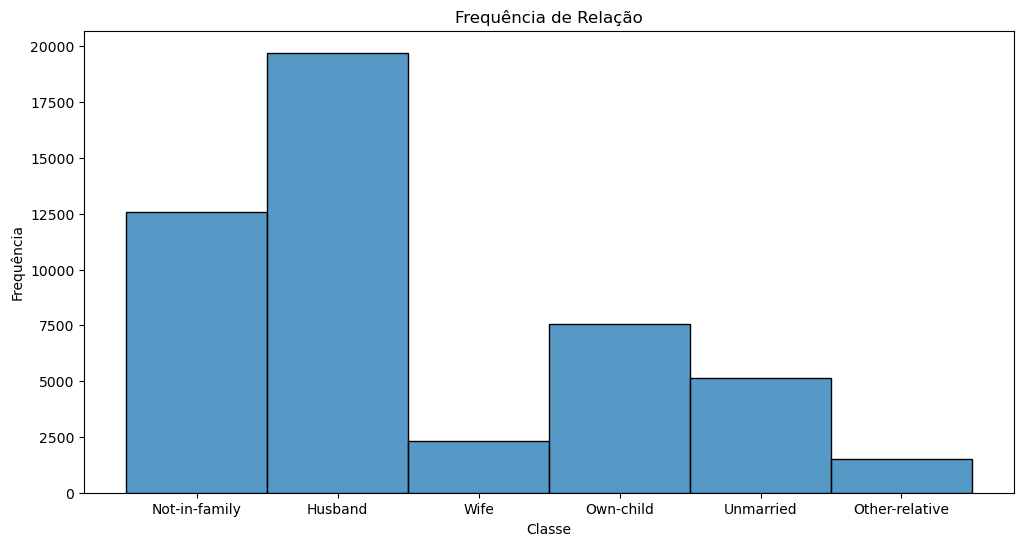

In [160]:
# Criação do grafico histograma para a variável 'fixed acidity'
plt.figure(figsize=(12, 6))
sns.histplot(X["relationship"])
plt.title("Frequência de Relação")
plt.xlabel("Classe")
plt.ylabel("Frequência")
plt.show()

Ao analisar o histograma, podemos verificar que a maior parte da amostra é composta por "Husband" (Marido) e "Not-in-family" (Não está em família). As outras relações, como "Wife" (Esposa) e "Other-relative" (Outro parente), possuem frequências mais baixas, mas são bastante próximas entre si.

### Race

In [161]:
X['race'].describe()

count     48842
unique        5
top       White
freq      41762
Name: race, dtype: object

Ao analisar as variáveis "education" e "occupation", observamos que as classes mais predominantes são aquelas com altos níveis de escolaridade e empregos que não exigem muita mão de obra. Isso nos leva a verificar que a variável "race" possui a classe "White" como a moda, representando 85% do banco de dados. Essa disparidade sugere uma possível falta de diversidade racial, refletindo desigualdades estruturais que podem impactar o acesso à educação e às oportunidades de emprego para outras raças, como asiático-pacífico-ilhéu, ameríndio-esquimó, outras e pretos.

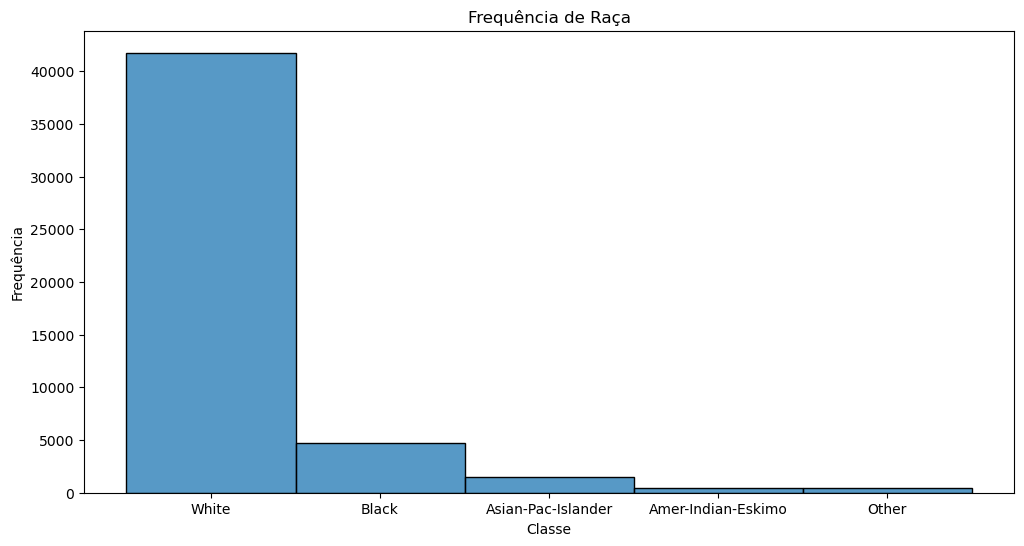

In [162]:
# Criação do grafico histograma para a variável 'fixed acidity'
plt.figure(figsize=(12, 6))
sns.histplot(X["race"])
plt.title("Frequência de Raça")
plt.xlabel("Classe")
plt.ylabel("Frequência")
plt.show()

O histograma da variável "race" ilustra claramente a disparidade racial presente no conjunto de dados. A classe "White" domina a amostra, representando uma porcentagem significativa dos indivíduos, enquanto as outras categorias, como "Black", "Asian-Pac-Islander", "Amer-Indian-Eskimo" e "Other", apresentam frequências muito menores. Essa discrepância levanta questões importantes sobre representatividade e inclusão no conjunto de dados, destacando a necessidade de abordagens mais equitativas na coleta e análise de dados demográficos.

### Sex

In [163]:
X['sex'].describe()

count     48842
unique        2
top        Male
freq      32650
Name: sex, dtype: object

In [164]:
32650/48842

0.6684820441423365

Como visto na variável "relationship", onde a classe "Husband" foi identificada como moda, a variável "sex" confirma que a amostra é predominantemente composta por homens, representando 66.85% do total da amostra.

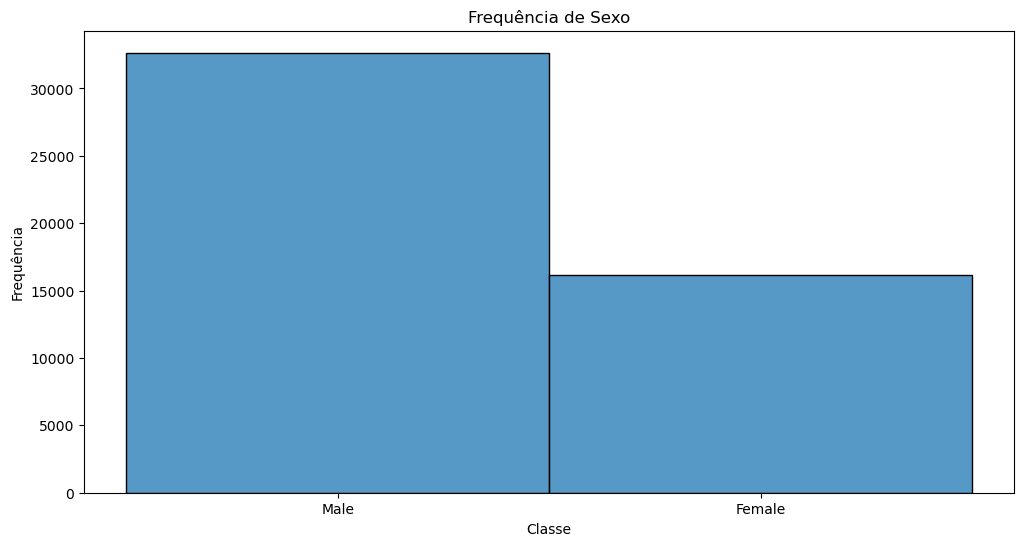

In [165]:
# Criação do grafico histograma para a variável 'fixed acidity'
plt.figure(figsize=(12, 6))
sns.histplot(X["sex"])
plt.title("Frequência de Sexo")
plt.xlabel("Classe")
plt.ylabel("Frequência")
plt.show()

### Capital-gain

In [166]:
X['capital-gain'].describe()

count    48842.000000
mean      1079.067626
std       7452.019058
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

Observando as estatísticas da variável "capital-gain", podemos perceber que seu terceiro quartil (Q3), conhecido como mediana, é igual à moda, ambos sendo 0 (zero), o que indica que pelo menos 75% dos dados têm um valor de capital-gain de 0. Além disso, podemos visualizar que o valor máximo é 99,999, sendo esse e outros valores acima de zero possíveis outliers.

A média da variável "capital-gain" é de aproximadamente 1,079.07, mas possui um alto desvio padrão de 7,452.02, indicando uma grande variação nos valores de ganhos de capital entre os indivíduos da amostra.

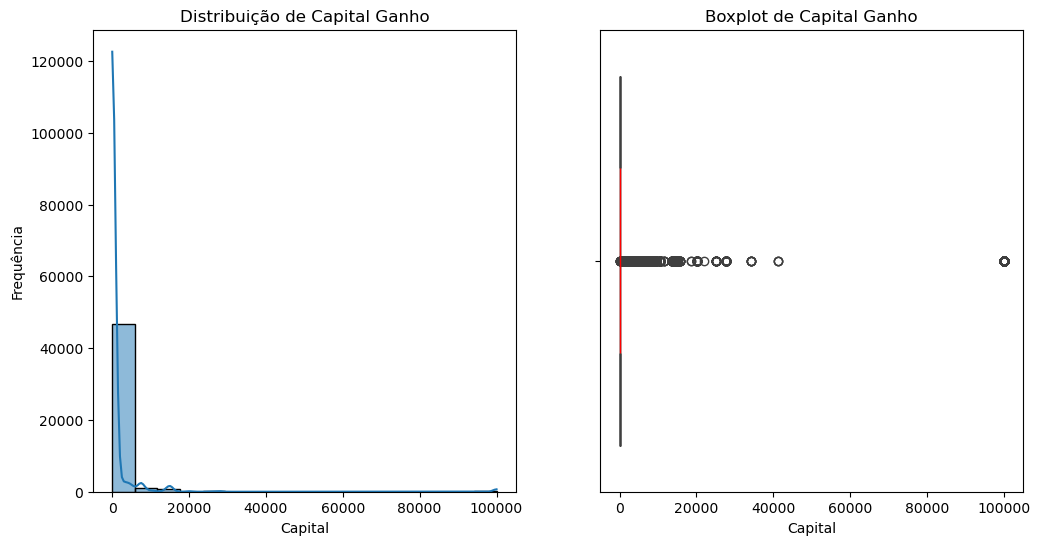

In [167]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(X["capital-gain"], kde=True)
plt.title("Distribuição de Capital Ganho")
plt.xlabel("Capital")
plt.ylabel("Frequência")
plt.subplot(1, 2, 2)
sns.boxplot(X["capital-gain"], orient='h', notch=True, showcaps=False,
            boxprops={"facecolor": (0, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot de Capital Ganho")
plt.xlabel("Capital")
plt.show()

### Capital-loss

In [168]:
X['capital-loss'].describe()

count    48842.000000
mean        87.502314
std        403.004552
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

As estatísticas da variável "capital-loss" se assemelham às da variável "capital-gain", com a mediana e a moda ambas sendo 0 (zero). Entretanto, diferentemente de "capital-gain", a variável "capital-loss" possui uma média de aproximadamente 87.50 e um desvio padrão próximo de 403, indicando que as perdas de capital entre as pessoas estudadas foram menores do que os ganhos. Também podemos visualizar que o valor máximo é 4,356, sendo esse e outros valores acima de zero possíveis outliers.

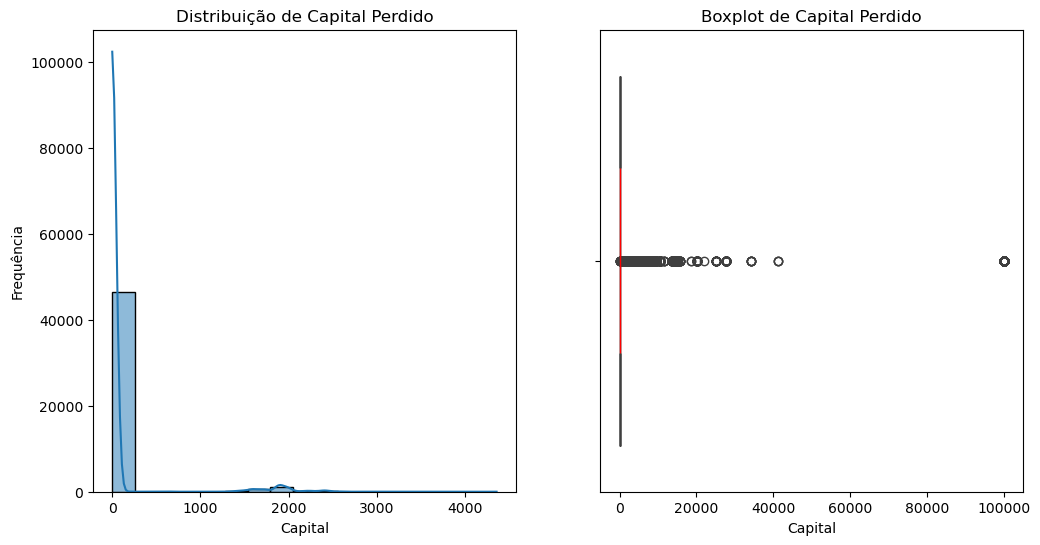

In [169]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(X["capital-loss"], kde=True)
plt.title("Distribuição de Capital Perdido")
plt.xlabel("Capital")
plt.ylabel("Frequência")
plt.subplot(1, 2, 2)
sns.boxplot(X["capital-gain"], orient='h', notch=True, showcaps=False,
            boxprops={"facecolor": (0, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot de Capital Perdido")
plt.xlabel("Capital")
plt.show()

### Hours-per-week

In [170]:
X['hours-per-week'].describe()

count    48842.000000
mean        40.422382
std         12.391444
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [171]:
X['hours-per-week'].mode()

0    40
Name: hours-per-week, dtype: int64

As medidas da variável "hours-per-week" indicam que a média, de aproximadamente 40.42 horas, está muito próxima da mediana de 40 horas. Além disso, o desvio padrão de cerca de 12.39 horas sugere que a maioria das observações estão entre 27.87 e 52.61 horas por semana. Como o primeiro e o segundo quartil são iguais a 40, podemos inferir que a moda também é 40.

O fato de a média, a mediana e a moda estarem próximas sugere que a distribuição é aproximadamente simétrica. No entanto, a distribuição pode ser ligeiramente assimétrica devido ao valor máximo de 99 horas e mínimo de 1 hora.

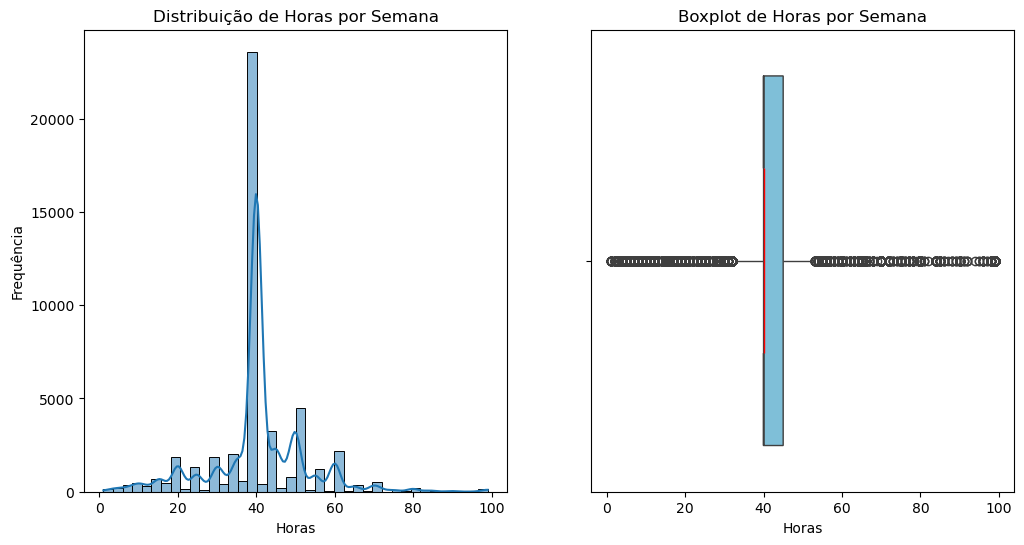

In [172]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(X["hours-per-week"], kde=True, bins=40)
plt.title("Distribuição de Horas por Semana")
plt.xlabel("Horas")
plt.ylabel("Frequência")
plt.subplot(1, 2, 2)
sns.boxplot(X["hours-per-week"], orient='h', notch=True, showcaps=False,
            boxprops={"facecolor": (0, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot de Horas por Semana")
plt.xlabel("Horas")
plt.show()

Os gráficos indicam que a maioria das pessoas na amostra trabalha 40 horas por semana, mas há uma variedade de cargas horárias menores e maiores. A presença de muitos outliers mostra que, embora a carga horária padrão seja de 40 horas, há uma diversidade significativa nas horas trabalhadas, com algumas pessoas trabalhando muito mais ou muito menos do que a média.

Em resumo, enquanto a distribuição de horas trabalhadas por semana mostra uma tendência centralizada em torno de 40 horas com uma forma geralmente simétrica, há uma leve assimetria positiva devido à presença de alguns valores extremos maiores.

### Native-country

In [173]:
X['native-country'].describe()

count             48568
unique               42
top       United-States
freq              43832
Name: native-country, dtype: object

Ao observar o resumo da variável "native-country", podemos ver que ela é categórica e possui 42 classes, representando diferentes países. Entre os países nativos das pessoas, há uma prevalência significativa de nativos dos Estados Unidos, com 43,832 pessoas pertencentes a esse país, o que corresponde a aproximadamente 90% da amostra total. Além disso, podemos inferir que as 274 observações faltantes podem pertencer a imigrantes que optaram por omitir sua nacionalidade.

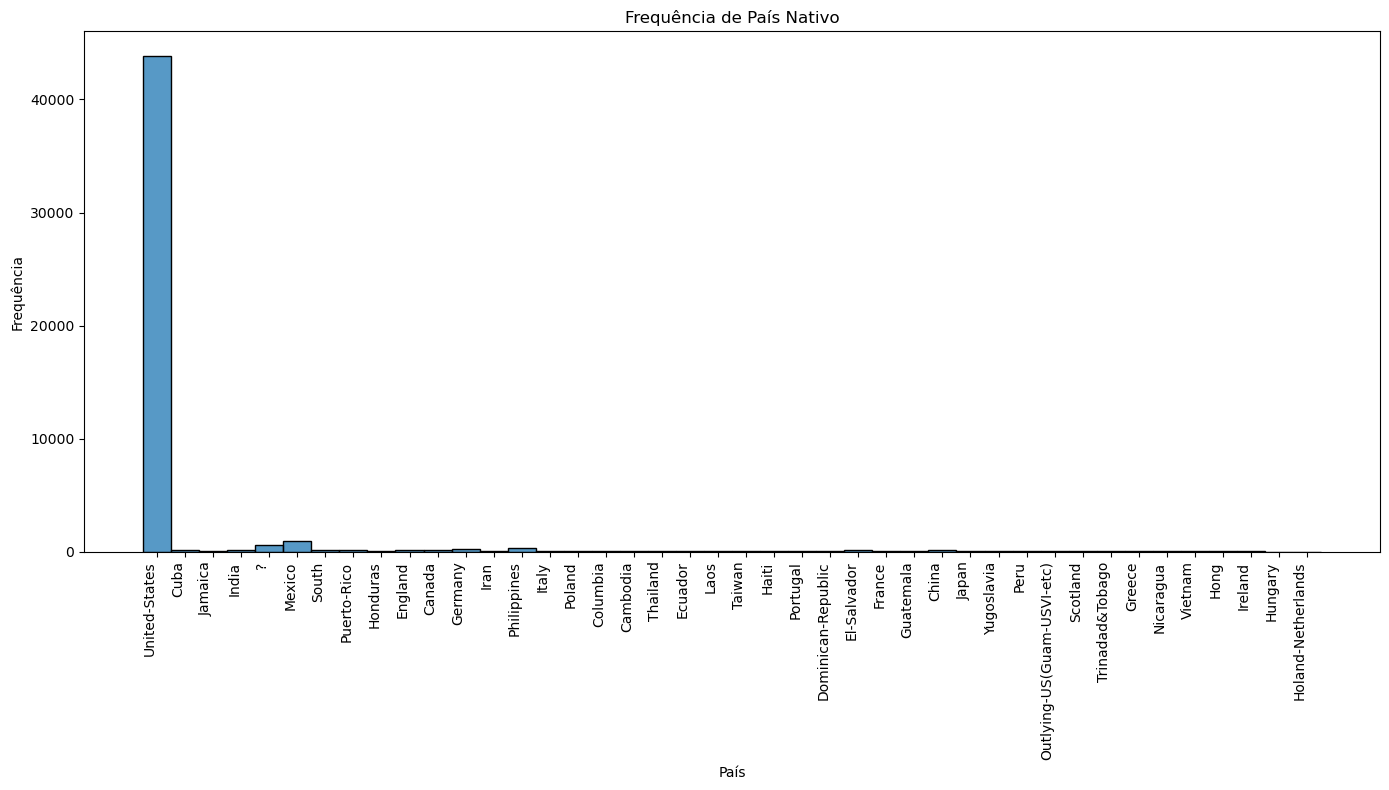

In [174]:
plt.figure(figsize=(14, 8)) 
sns.histplot(X["native-country"], bins=50)
plt.title("Frequência de País Nativo")
plt.xlabel("País")
plt.ylabel("Frequência")
plt.xticks(rotation=90, ha='right')  # Rotaciona os rótulos do eixo x em 90 graus e alinha à direita
plt.tight_layout()  # Ajusta o layout para melhor visualização dos rótulos
plt.show()

Podemos visualizar que o segundo país com o maior número de observações é o México. Além disso, também notamos novamente a presença da classe "?" entre os países, indicando dados ausentes ou não especificados. Futuramente, planejamos remover as observações que contêm essa classe e verificar se isso melhora o ajuste do modelo.

## Variável Resposta

### Income

In [175]:
y.replace({"<=50K": 0, ">50K": 1, "<=50K.": 0, ">50K.": 1}, inplace=True)
y.dropna(inplace=True)

Fizemos uma modificação na categorização das duas classes existentes na variável 'income' para facilitar os ajustes nos modelos de aprendizado de máquina. A classe que identifica pessoas com renda inferior a 50 mil teve o valor 0 atribuído, enquanto aquelas com renda igual ou superior a 50 mil receberam o valor 1.

In [176]:
print('Nº Observações')
print(f'0: {(y== 0).sum()[0]}')
print(f'1: {(y== 1).sum()[0]}')

Nº Observações
0: 37155
1: 11687


No código acima, podemos observar que a classe 0 é a mais predominante no banco de dados, totalizando 37,155 observações, o que representa aproximadamente 76.07% de todas as observações. Por outro lado, a classe 1 conta com 11,687 observações, correspondendo a cerca de 23.93% do banco de dados

In [177]:
11687/48842

0.23928176569346055

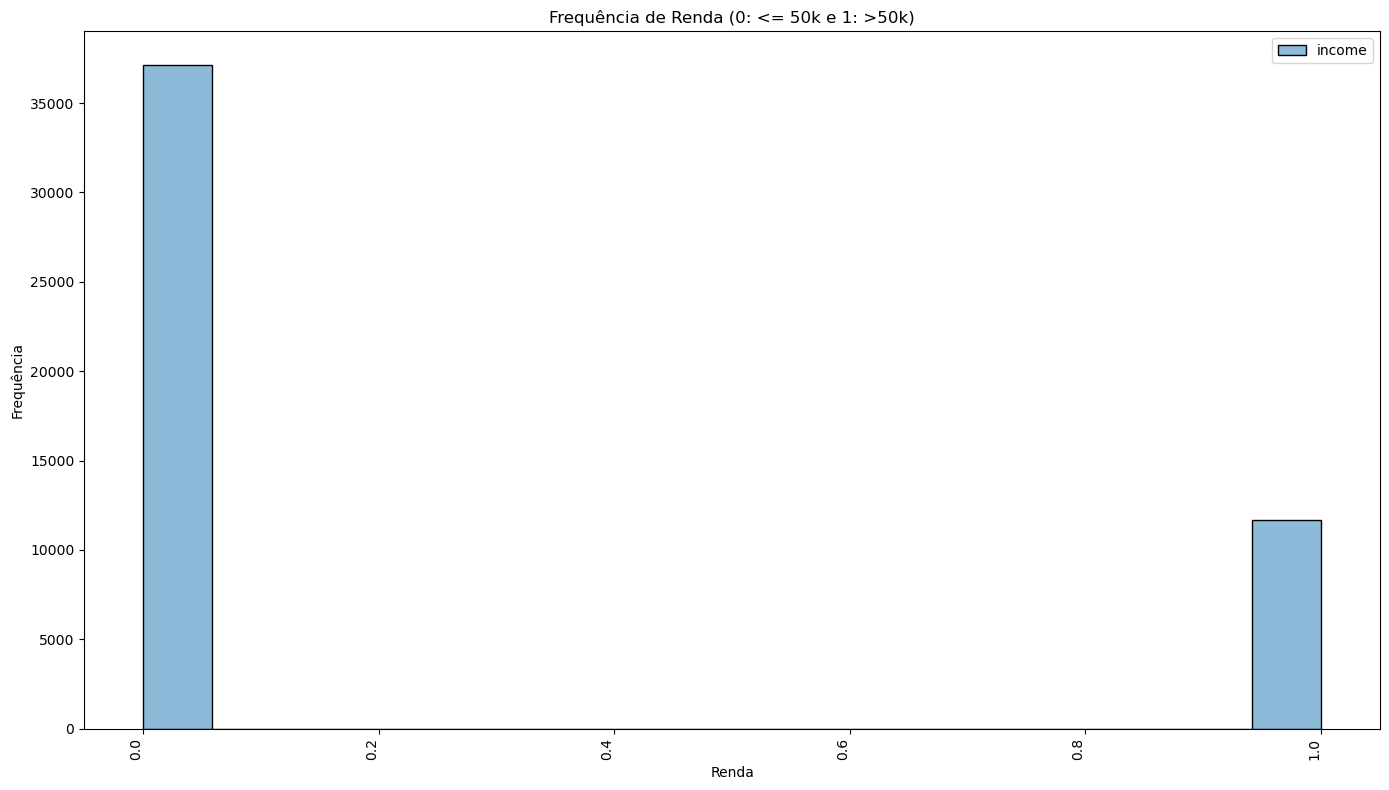

In [178]:
plt.figure(figsize=(14, 8)) 
sns.histplot(y)
plt.title("Frequência de Renda (0: <= 50k e 1: >50k)")
plt.xlabel("Renda")
plt.ylabel("Frequência")
plt.xticks(rotation=90, ha='right')  # Rotaciona os rótulos do eixo x em 90 graus e alinha à direita
plt.tight_layout()  # Ajusta o layout para melhor visualização dos rótulos
plt.show()

Devido ao desbalanceamento no banco de dados entre as classes, uma abordagem recomendada para treinar modelos de aprendizado de máquina é utilizar validação cruzada. Isso permite uma avaliação mais robusta do desempenho do modelo, garantindo que ele seja capaz de generalizar bem para novos dados.

# Transformação das Variáveis

Nesta seção, vamos criar um novo banco de dados chamado 'Xt', que conterá todas as alterações feitas no banco de dados inicial, para que possamos compará-lo com o modelo ajustado.

## Remoção classe "?"

A primeira modificação que propomos para o banco de dados é a remoção da classe "?" encontrada em algumas variáveis categóricas.

In [179]:
Xt = X[~X.apply(lambda row: row.astype(str).str.contains('\?').any(), axis=1)]

## Age

Como observado anteriormente, a variável 'age' apresenta assimetria positiva. Portanto, vamos propor uma transformação para melhorar sua distribuição.

In [180]:
Xt['age'] = (Xt['age'])**(1/2.15)

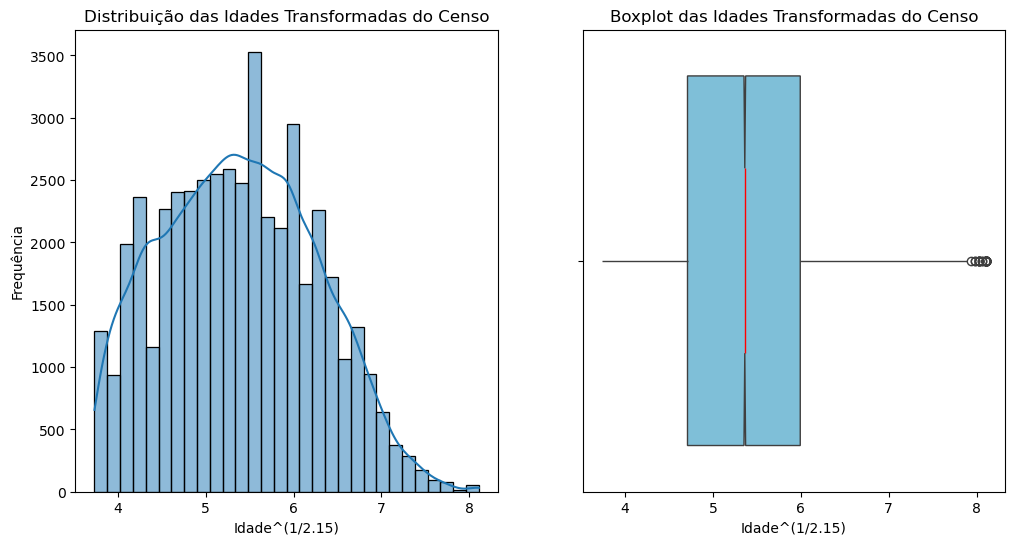

In [181]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(Xt["age"], kde=True, bins=30)
plt.title("Distribuição das Idades Transformadas do Censo")
plt.xlabel("Idade^(1/2.15)")
plt.ylabel("Frequência")
plt.subplot(1, 2, 2)
sns.boxplot(Xt["age"], orient='h', notch=True, showcaps=False,
            boxprops={"facecolor": (0, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot das Idades Transformadas do Censo")
plt.xlabel("Idade^(1/2.15)")
plt.show()

Como podemos observar nos gráficos acima, tanto no boxplot quanto no histograma, a transformação da idade elevada a (1/2.15) resultou em uma melhora significativa na distribuição das observações de idade. Isso proporcionou uma melhor uniformidade entre os quartis do boxplot, com a média e a mediana tendendo a estar mais centralizadas no retângulo.

##  Fnlwgt

Assim como a distribuição da variável "age", a variável "fnlwgt" também apresenta assimetria positiva, porém com uma alta incidência de outliers com valores muito altos. Portanto, a transformação visa melhorar esses dois aspectos.

In [182]:
Xt['fnlwgt'] = np.log(Xt['fnlwgt'])
Xt['fnlwgt'] = (Xt['fnlwgt'] - Xt['fnlwgt'].mean()) / Xt['fnlwgt'].std()

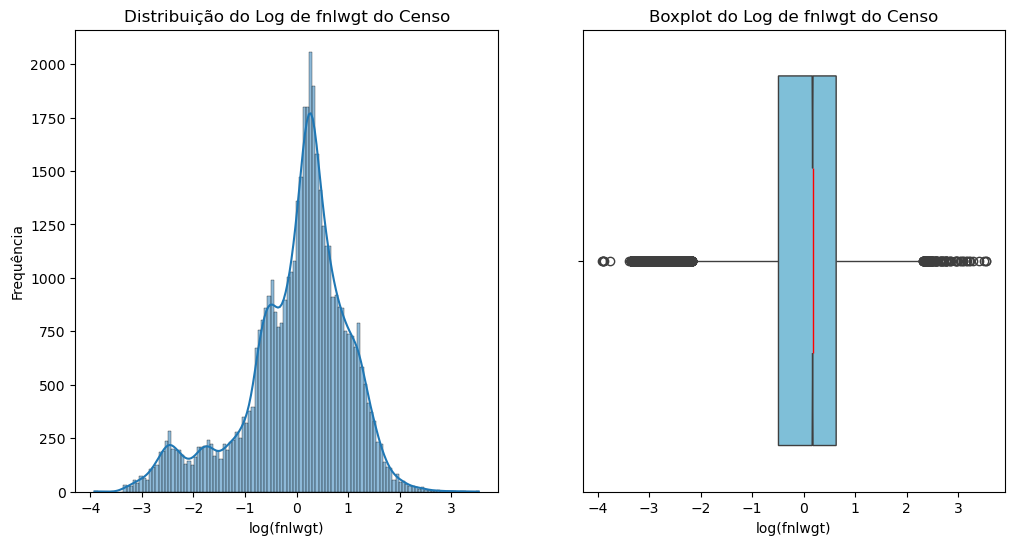

In [183]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(Xt["fnlwgt"], kde=True)
plt.title("Distribuição do Log de fnlwgt do Censo")
plt.xlabel("log(fnlwgt)")
plt.ylabel("Frequência")
plt.subplot(1, 2, 2)
sns.boxplot(Xt["fnlwgt"], orient='h', notch=True, showcaps=False,
            boxprops={"facecolor": (0, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot do Log de fnlwgt do Censo")
plt.xlabel("log(fnlwgt)")
plt.show()

A melhor transformação para a variável 'fnlwgt' foi a aplicação do logaritmo, que resultou em um leve ajuste na sua assimetria, porém não teve um impacto significativo na redução dos outliers.

## Capital-gain e Capital-loss

As variáveis "capital-gain" e "capital-loss" mostram uma alta concentração de valores iguais a zero, além de diversos outliers com valores extremamente elevados. Para abordar essa situação, sugerimos uma transformação nas variáveis.

In [184]:
Xt['capital-gain'] = (Xt['capital-gain'] - Xt['capital-gain'].mean()) / Xt['capital-gain'].std()
Xt['capital-loss'] = (Xt['capital-loss'] - Xt['capital-loss'].mean()) / Xt['capital-loss'].std()

A proposta inicial de aplicar transformações como logarítmica, exponencial e raízes às variáveis não conseguiu corrigir a assimetria observada, devido à alta quantidade de observações iguais a zero e valores distantes de zero. Por esse motivo, para aprimorar modelos que dependem da distância entre pontos, como o SVM, optamos por utilizar a padronização com o método Z-score.

## Hours-per-week

Como a variável 'hours-per-week' já apresenta uma boa simetria nos dados, vamos propor apenas uma padronização usando o método Z-score.

In [185]:
Xt['hours-per-week'] = (Xt['hours-per-week'] - Xt['hours-per-week'].mean()) / Xt['hours-per-week'].std()

# Criação das amostras do dataset para os classificadores

In [186]:
X_sample = X.sample(frac=0.05, random_state=1)
X_sample = X_sample[X_sample.index.isin(Xt.index)]
y_sample = y.loc[X_sample.index]
Xt_sample = Xt.loc[X_sample.index]

# Separação Dados Teste, Vadaliação e Treinamento

In [187]:
# Selecionando colunas e aplicando one-hot-encoding
a = X_sample.iloc[:, [1, 3, 5, 6, 7, 8, 9, 13]]
at = Xt_sample.iloc[:, [1, 3, 5, 6, 7, 8, 9, 13]]
b = X_sample.iloc[:, [0, 2, 4, 10, 11, 12]]
bt = Xt_sample.iloc[:, [0, 2, 4, 10, 11, 12]]
a_hot = pd.get_dummies(a)
at_hot = pd.get_dummies(at)
X_dt = pd.concat([b, a_hot], axis=1)
Xt_dt = pd.concat([bt, at_hot], axis=1)
Y_dt = y_sample

# Construindo conjuntos de treinamento, validação e teste
X_train, X_test, y_train, y_test = train_test_split(X_dt, Y_dt, test_size=0.25, random_state=10)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=10)

# Construindo conjuntos de treinamento, validação e teste para banco de dados transformado
Xt_train = Xt_dt.loc[X_train.index]
Xt_test = Xt_dt.loc[X_test.index]
Xt_valid = Xt_dt.loc[X_valid.index]

# Inicializar uma lista para armazenar os resultados de cada classificador
results = []

# Árvore de Decisão (AD)

As Árvores de Decisão são modelos de machine learning utilizados para tarefas de classificação e regressão. Elas funcionam dividindo os dados de entrada em subconjuntos mais homogêneos com base em um conjunto de regras de decisão derivadas dos atributos dos dados. Cada nó interno representa uma pergunta sobre um atributo, cada ramo representa o resultado da pergunta e cada folha representa uma classe ou valor de saída. A construção de uma Árvore de Decisão envolve a seleção do melhor atributo para dividir os dados em cada nó, geralmente utilizando métricas como entropia, ganho de informação ou índice Gini. As Árvores de Decisão são fáceis de interpretar e entender, mas podem sofrer de sobreajuste, especialmente com dados ruidosos.

## Importando bibliotecas

In [188]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from math import ceil

## Treinando o classificador

### Banco de dados normal

In [189]:
# Espaço de busca de hiperparâmetros
max_depth_range = [3, 5, 7, 10, 15, 20, 30, None]
criterion_range = ['gini', 'entropy']

# Listas para armazenar as métricas
dt_scores_train = []
dt_scores_valid = []
dt_scores_cross = []
dt_precisions = []
dt_recalls = []
dt_f1s = []
dt_aucs = []

# Iteração para encontrar as melhores configurações
for depth in max_depth_range:
    for criterion in criterion_range:
        dt = DecisionTreeClassifier(max_depth=depth, criterion=criterion)
        scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
        dt_scores_cross.append(scores.mean())
        dt.fit(X_train, y_train)
        
        # Previsões
        y_train_pred = dt.predict(X_train)
        y_valid_pred = dt.predict(X_valid)
        y_valid_prob = dt.predict_proba(X_valid)[:, 1]
        
        # Armazenando as métricas
        dt_scores_train.append(dt.score(X_train, y_train))
        dt_scores_valid.append(dt.score(X_valid, y_valid))
        dt_precisions.append(precision_score(y_valid, y_valid_pred))
        dt_recalls.append(recall_score(y_valid, y_valid_pred))
        dt_f1s.append(f1_score(y_valid, y_valid_pred))
        dt_aucs.append(roc_auc_score(y_valid, y_valid_prob))

# Encontrando a melhor configuração testada
the_best_acc = dt_scores_cross.index(max(dt_scores_cross))
the_best_depth = ceil(the_best_acc / len(criterion_range)) - 1
the_best_criterion = the_best_acc % len(criterion_range)
st_out = ("Max Depth: " + str(max_depth_range[the_best_depth]) + " \nAcurácia: " +
          str(round(dt_scores_cross[the_best_acc], 3)) + "\nCriterion: " + str(criterion_range[the_best_criterion]))

### Banco de dados transformado

In [190]:
# Listas para armazenar as métricas
dt_scores_train_t = []
dt_scores_valid_t  = []
dt_scores_cross_t  = []
dt_precisions_t = []
dt_recalls_t = []
dt_f1s_t = []
dt_aucs_t = []

# Iteração para encontrar as melhores configurações
for depth in max_depth_range:
    for criterion in criterion_range:
        dt_t = DecisionTreeClassifier(max_depth=depth, criterion=criterion)
        scores = cross_val_score(dt, Xt_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
        dt_scores_cross_t.append(scores.mean())
        dt_t.fit(Xt_train, y_train)
        
        # Previsões
        y_train_pred_t = dt_t.predict(Xt_train)
        y_valid_pred_t= dt_t.predict(Xt_valid)
        y_valid_prob_t = dt_t.predict_proba(Xt_valid)[:, 1]
        
        # Armazenando as métricas
        dt_scores_train_t.append(dt_t.score(Xt_train, y_train))
        dt_scores_valid_t.append(dt_t.score(Xt_valid, y_valid))
        dt_precisions_t.append(precision_score(y_valid, y_valid_pred_t))
        dt_recalls_t.append(recall_score(y_valid, y_valid_pred_t))
        dt_f1s_t.append(f1_score(y_valid, y_valid_pred_t))
        dt_aucs_t.append(roc_auc_score(y_valid, y_valid_prob_t))

# Encontrando a melhor configuração testada
the_best_acc_t = dt_scores_cross_t.index(max(dt_scores_cross_t))
the_best_depth_t = ceil(the_best_acc_t/ len(criterion_range)) - 1
the_best_criterion_t = the_best_acc_t % len(criterion_range)
st_out_t = ("Max Depth: " + str(max_depth_range[the_best_depth_t]) + " \nAcurácia: " +
          str(round(dt_scores_cross_t[the_best_acc_t], 3)) + "\nCriterion: " + str(criterion_range[the_best_criterion_t]))

## Apresentando os resultados

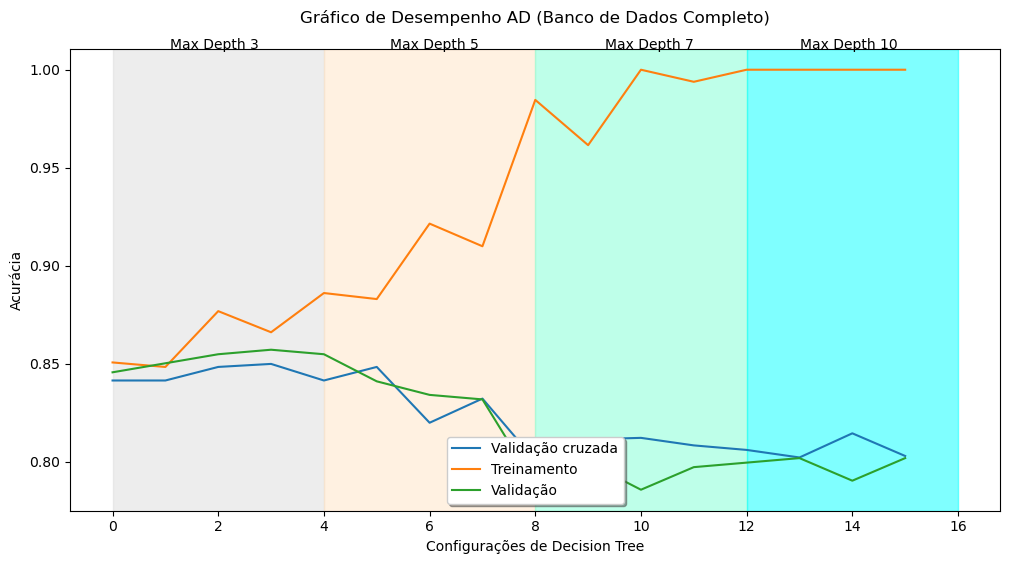

DADOS COMPLETOS
Desempenho da melhor configuração testada:
Max Depth: 5
Criterion: entropy
Acurácia de treinamento clf: 0.866
Acurácia de validação clf: 0.857
Acurácia de teste clf: 0.844
Precision clf: 0.713
Recall clf: 0.590
F1 clf: 0.646
AUC-ROC clf: 0.856


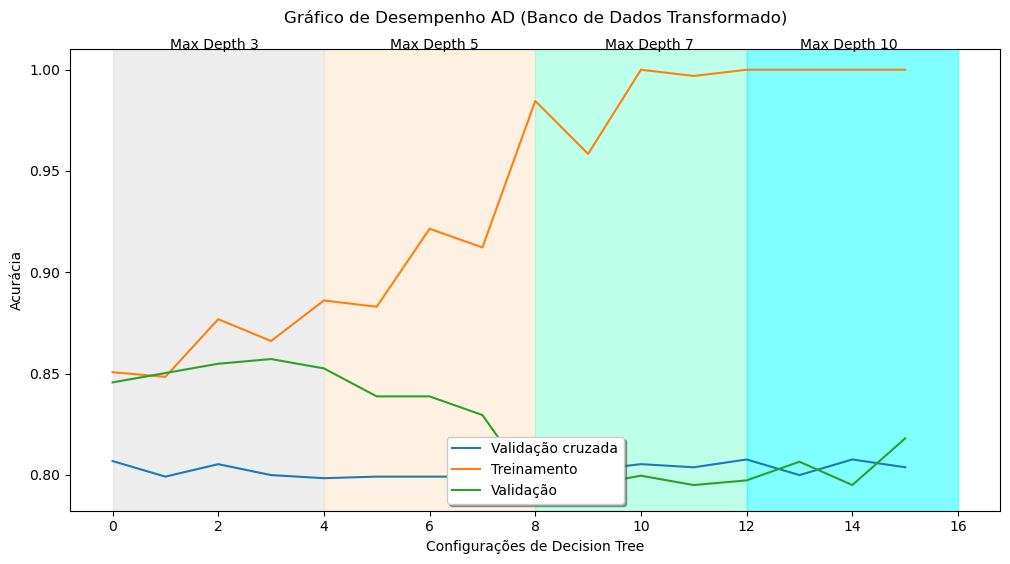


DADOS TRANSFOMADO
Desempenho da melhor configuração testada:
Max Depth: 30
Criterion: gini
Acurácia de treinamento clf: 1.000
Acurácia de validação clf: 0.797
Acurácia de teste clf: 0.768
Precision clf: 0.515
Recall clf: 0.626
F1 clf: 0.565
AUC-ROC clf: 0.720


In [191]:
# Ajustando o tamanho do gráfico
plt.figure(figsize=(12, 6))
# Apresentando todas as configurações testadas
plt.plot(list(range(0, len(dt_scores_cross))), dt_scores_cross)
plt.plot(list(range(0, len(dt_scores_train))), dt_scores_train)
plt.plot(list(range(0, len(dt_scores_valid))), dt_scores_valid)
plt.axvspan(0, 2*len(criterion_range), color='gainsboro', alpha=0.5)
plt.axvspan(2*len(criterion_range), 4*len(criterion_range), color='bisque', alpha=0.5)
plt.axvspan(4*len(criterion_range), 6*len(criterion_range), color='aquamarine', alpha=0.5)
plt.axvspan(6*len(criterion_range), 8*len(criterion_range), color='cyan', alpha=0.5)
plt.annotate('Max Depth 3', xy=(170, 515), xycoords='figure pixels')
plt.annotate('Max Depth 5', xy=(390, 515), xycoords='figure pixels')
plt.annotate('Max Depth 7', xy=(605, 515), xycoords='figure pixels')
plt.annotate('Max Depth 10', xy=(800, 515), xycoords='figure pixels')
# plt.annotate(st_out, xy=(720, 460), xycoords='figure pixels', xytext=(-40, -70), textcoords='offset points',
#         arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-95"))

plt.legend(('Validação cruzada', 'Treinamento', 'Validação'), loc='lower center', shadow=True)
plt.xlabel('Configurações de Decision Tree')
plt.ylabel('Acurácia')
plt.title('Gráfico de Desempenho AD (Banco de Dados Completo)\n')
plt.show()

# Desempenho da melhor configuração
clf = DecisionTreeClassifier(max_depth=max_depth_range[the_best_depth], criterion=criterion_range[the_best_criterion], random_state=10)
clf.fit(X_train, y_train)
print('DADOS COMPLETOS')
print("Desempenho da melhor configuração testada:")
print("Max Depth: %s" % max_depth_range[the_best_depth])
print("Criterion: %s" % criterion_range[the_best_criterion])
print("Acurácia de treinamento clf: %0.3f" % clf.score(X_train, y_train))
print("Acurácia de validação clf: %0.3f" % clf.score(X_valid, y_valid))
print("Acurácia de teste clf: %0.3f" % clf.score(X_test, y_test))
print("Precision clf: %0.3f" % precision_score(y_test, clf.predict(X_test)))
print("Recall clf: %0.3f" % recall_score(y_test, clf.predict(X_test)))
print("F1 clf: %0.3f" % f1_score(y_test, clf.predict(X_test)))
print("AUC-ROC clf: %0.3f" % roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

# Definir um dicionário para armazenar os resultados atuais
current_results_decision_tree = {
    "Classificador": "AD",
    "Max Depth": max_depth_range[the_best_depth],
    "Criterion": criterion_range[the_best_criterion],
    "Acurácia de Treinamento": clf.score(X_train, y_train),
    "Acurácia de Validação": clf.score(X_valid, y_valid),
    "Acurácia de Teste": clf.score(X_test, y_test),
    "Precision": precision_score(y_test, clf.predict(X_test)),
    "Recall": recall_score(y_test, clf.predict(X_test)),
    "F1": f1_score(y_test, clf.predict(X_test)),
    "AUC-ROC": roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
}

################################### DADOS TRANSFORMADO #################################

# Ajustando o tamanho do gráfico
plt.figure(figsize=(12, 6))
# Apresentando todas as configurações testadas
plt.plot(list(range(0, len(dt_scores_cross_t))), dt_scores_cross_t)
plt.plot(list(range(0, len(dt_scores_train_t))), dt_scores_train_t)
plt.plot(list(range(0, len(dt_scores_valid_t))), dt_scores_valid_t)
plt.axvspan(0, 2*len(criterion_range), color='gainsboro', alpha=0.5)
plt.axvspan(2*len(criterion_range), 4*len(criterion_range), color='bisque', alpha=0.5)
plt.axvspan(4*len(criterion_range), 6*len(criterion_range), color='aquamarine', alpha=0.5)
plt.axvspan(6*len(criterion_range), 8*len(criterion_range), color='cyan', alpha=0.5)
plt.annotate('Max Depth 3', xy=(170, 515), xycoords='figure pixels')
plt.annotate('Max Depth 5', xy=(390, 515), xycoords='figure pixels')
plt.annotate('Max Depth 7', xy=(605, 515), xycoords='figure pixels')
plt.annotate('Max Depth 10', xy=(800, 515), xycoords='figure pixels')
# plt.annotate(st_out, xy=(720, 460), xycoords='figure pixels', xytext=(-40, -70), textcoords='offset points',
#         arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-95"))

plt.legend(('Validação cruzada', 'Treinamento', 'Validação'), loc='lower center', shadow=True)
plt.xlabel('Configurações de Decision Tree')
plt.ylabel('Acurácia')
plt.title('Gráfico de Desempenho AD (Banco de Dados Transformado)\n')
plt.show()

# Desempenho da melhor configuração
clf_t = DecisionTreeClassifier(max_depth=max_depth_range[the_best_depth_t], criterion=criterion_range[the_best_criterion_t], random_state=10)
clf_t.fit(Xt_train, y_train)
print('\nDADOS TRANSFOMADO')
print("Desempenho da melhor configuração testada:")
print("Max Depth: %s" % max_depth_range[the_best_depth_t])
print("Criterion: %s" % criterion_range[the_best_criterion_t])
print("Acurácia de treinamento clf: %0.3f" % clf_t.score(Xt_train, y_train))
print("Acurácia de validação clf: %0.3f" % clf_t.score(Xt_valid, y_valid))
print("Acurácia de teste clf: %0.3f" % clf_t.score(Xt_test, y_test))
print("Precision clf: %0.3f" % precision_score(y_test, clf_t.predict(Xt_test)))
print("Recall clf: %0.3f" % recall_score(y_test, clf_t.predict(Xt_test)))
print("F1 clf: %0.3f" % f1_score(y_test, clf_t.predict(Xt_test)))
print("AUC-ROC clf: %0.3f" % roc_auc_score(y_test, clf_t.predict_proba(Xt_test)[:, 1]))

current_results_decision_tree_t = {
    "Classificador": "AD_t",
    "Max Depth": max_depth_range[the_best_depth_t],
    "Criterion": criterion_range[the_best_criterion_t],
    "Acurácia de Treinamento": clf_t.score(Xt_train, y_train),
    "Acurácia de Validação": clf_t.score(Xt_valid, y_valid),
    "Acurácia de Teste": clf_t.score(Xt_test, y_test),
    "Precision": precision_score(y_test, clf_t.predict(Xt_test)),
    "Recall": recall_score(y_test, clf_t.predict(Xt_test)),
    "F1": f1_score(y_test, clf_t.predict(Xt_test)),
    "AUC-ROC": roc_auc_score(y_test, clf_t.predict_proba(Xt_test)[:, 1])
}

# Adicionar os resultados atuais à lista de resultados
results.append(current_results_decision_tree)
results.append(current_results_decision_tree_t)

Após ajustar o modelo de Árvore de Decisão (AD) e explorar diversas configurações, identificamos que a melhor configuração foi obtida utilizando uma profundidade máxima de 5 e o critério Entropy.

Ao analisar o desempenho do modelo, observamos que ele atingiu uma acurácia de aproximadamente 86.6% nos dados de treinamento, 85.7% nos dados de validação e 84.9% nos dados de teste. A precisão do modelo foi de 71.3%, indicando que ele classificou corretamente cerca de 71 de 100 das instâncias positivas (classe "renda <= 50k"). No entanto, o modelo apresentou desafios em termos de recall, especialmente devido ao desbalanceamento dos dados, onde a classe positiva é predominante. O recall foi de 59%, significando que cerca de 59% das instâncias positivas foram corretamente identificadas. A média harmônica F1-score, que balanceia precisão e recall, foi de 64.6%.

Adicionalmente, a análise da área sob a curva ROC (AUC-ROC) revelou um valor de 0.856, demonstrando um desempenho superior ao de um classificador aleatório.

# Support Vector Machines (SVM)

Os Support Vector Machines são modelos supervisionados de aprendizado de máquina usados principalmente para tarefas de classificação, embora também possam ser aplicadas a problemas de regressão. A ideia central do SVM é encontrar um hiperplano em um espaço de alta dimensão que separa os dados em diferentes classes com a maior margem possível. Esse hiperplano é definido pelos vetores de suporte, que são os pontos de dados mais próximos do hiperplano. SVMs podem utilizar diferentes funções de kernel (linear, polinomial, radial, etc.) para lidar com dados que não são linearmente separáveis. Elas são eficazes em espaços de alta dimensão e em casos onde a relação entre as características não é linear.

## Importando bibliotecas

In [192]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.calibration import CalibratedClassifierCV

## Treinando o classificador

### Banco de dados normal

In [193]:
#criando o classificador
clf = SVC()

#treinando o classificador com a funcao fit
clf.fit(X_train, y_train)


SVC()

In [194]:
#criando o classificador
clf_t = SVC()

#treinando o classificador com a funcao fit
clf_t.fit(Xt_train, y_train)


SVC()

In [ ]:
# Construindo o espaço de busca por configurações do classificador
kernels_range = ['linear', 'poly', 'rbf', 'sigmoid']
c_range = [0.1, 1, 2, 4, 5, 10, 15, 20, 30, 50, 100, 200, 500, 1000]
gamma_ = [1, 3, 4, 5, 7, 10, 15, 20, 25, 30, 40, 50, 100, 200, 500, 1000]

# c_range = [0.01, 0.1, 1, 10, 100, 1000]  # Reduzido para valores mais espaçados
# gamma_range = [0.001, 0.01, 0.1, 1, 10, 100]  # Reduzido para valores mais espaçados


# Listas para armazenar as métricas
k_scores_train = []
k_scores_valid = []
k_scores_cross = []
k_precisions = []
k_recalls = []
k_f1s = []
k_aucs = []

# Use iteration to calculate different kernels in models,
# then return the average accuracy based on the cross validation
for j in range(len(kernels_range)):
    for k in c_range:
        if kernels_range[j] == 'linear':
            svc = LinearSVC(C=k, random_state=10)
            svc = CalibratedClassifierCV(svc)  # Calibra o LinearSVC para obter probabilidades
        else:
            svc = SVC(C=k, kernel=kernels_range[j], probability=True, random_state=10)  # Adiciona probability=True para calcular AUC-ROC
        scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
        k_scores_cross.append(scores.mean())
        svc.fit(X_train, y_train)
        
        # Previsões
        y_train_pred = svc.predict(X_train)
        y_valid_pred = svc.predict(X_valid)
        y_valid_prob = svc.predict_proba(X_valid)[:, 1]
        
        # Armazenando as métricas
        k_scores_train.append(svc.score(X_train, y_train))
        k_scores_valid.append(svc.score(X_valid, y_valid))
        k_precisions.append(precision_score(y_valid, y_valid_pred))
        k_recalls.append(recall_score(y_valid, y_valid_pred))
        k_f1s.append(f1_score(y_valid, y_valid_pred))
        k_aucs.append(roc_auc_score(y_valid, y_valid_prob))

# Encontrando a melhor configuração testada
the_best_acc = k_scores_cross.index(max(k_scores_cross))
the_best_kernel = ceil(the_best_acc / len(c_range)) - 1
the_best_c = the_best_acc / len(c_range)
the_best_c = (the_best_c - int(the_best_c)) * len(c_range)
st_out = ("Kernel: " + str(kernels_range[the_best_kernel]) + " \nAcurácia: " +
          str(round(k_scores_cross[the_best_acc], 3)) + "\nC: " + str(c_range[int(the_best_c)]))


### Banco de dados transformado

In [196]:
#criando o classificador
clf_t = SVC()

#treinando o classificador com a funcao fit
clf_t.fit(Xt_train, y_train)


SVC()

In [ ]:
# Listas para armazenar as métricas
k_scores_train_t = []
k_scores_valid_t= []
k_scores_cross_t = []
k_precisions_t= []
k_recalls_t = []
k_f1s_t = []
k_aucs_t = []

# Use iteration to calculate different kernels in models,
# then return the average accuracy based on the cross validation
for j in range(len(kernels_range)):
    for k in c_range:
        if kernels_range[j] == 'linear':
            svc = LinearSVC(C=k, random_state=10)
            svc = CalibratedClassifierCV(svc)  # Calibra o LinearSVC para obter probabilidades
        else:
            svc = SVC(C=k, kernel=kernels_range[j], probability=True, random_state=10)  # Adiciona probability=True para calcular AUC-ROC
        scores = cross_val_score(svc, Xt_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
        k_scores_cross_t.append(scores.mean())
        svc.fit(Xt_train, y_train)
        
        # Previsões
        y_train_pred = svc.predict(Xt_train)
        y_valid_pred = svc.predict(Xt_valid)
        y_valid_prob = svc.predict_proba(Xt_valid)[:, 1]
        
        # Armazenando as métricas
        k_scores_train_t.append(svc.score(Xt_train, y_train))
        k_scores_valid_t.append(svc.score(Xt_valid, y_valid))
        k_precisions_t.append(precision_score(y_valid, y_valid_pred))
        k_recalls_t.append(recall_score(y_valid, y_valid_pred))
        k_f1s_t.append(f1_score(y_valid, y_valid_pred))
        k_aucs_t.append(roc_auc_score(y_valid, y_valid_prob))

# Encontrando a melhor configuração testada
the_best_acc_t = k_scores_cross_t.index(max(k_scores_cross_t))
the_best_kernel_t = ceil(the_best_acc_t / len(c_range)) - 1
the_best_c_t = the_best_acc_t / len(c_range)
the_best_c_t = (the_best_c_t - int(the_best_c_t)) * len(c_range)
st_out_t = ("Kernel: " + str(kernels_range[the_best_kernel_t]) + " \nAcurácia: " +
          str(round(k_scores_cross_t[the_best_acc_t], 3)) + "\nC: " + str(c_range[int(the_best_c_t)]))


## Apresentando os resultados

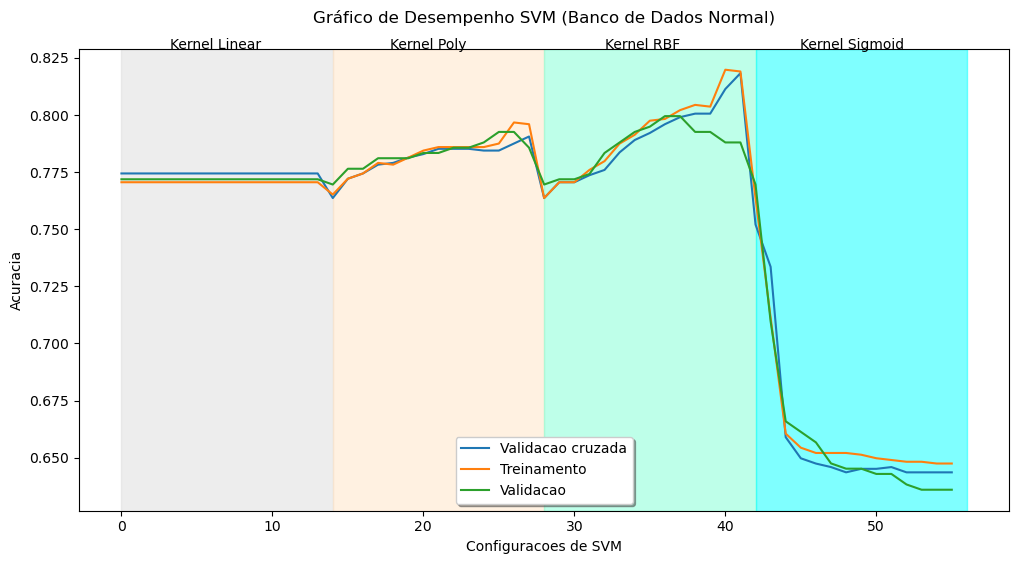


DADOS NORMAL
Desempenho da melhor configuracao testada:
Kernel: rbf
Acuracia de treinamento clf: 0.8191
Acuracia de validacao clf: 0.7880
Acuracia de teste clf: 0.7734
Precision clf: 0.5645
Recall clf: 0.2518
F1 clf: 0.3483
AUC-ROC clf: 0.6650


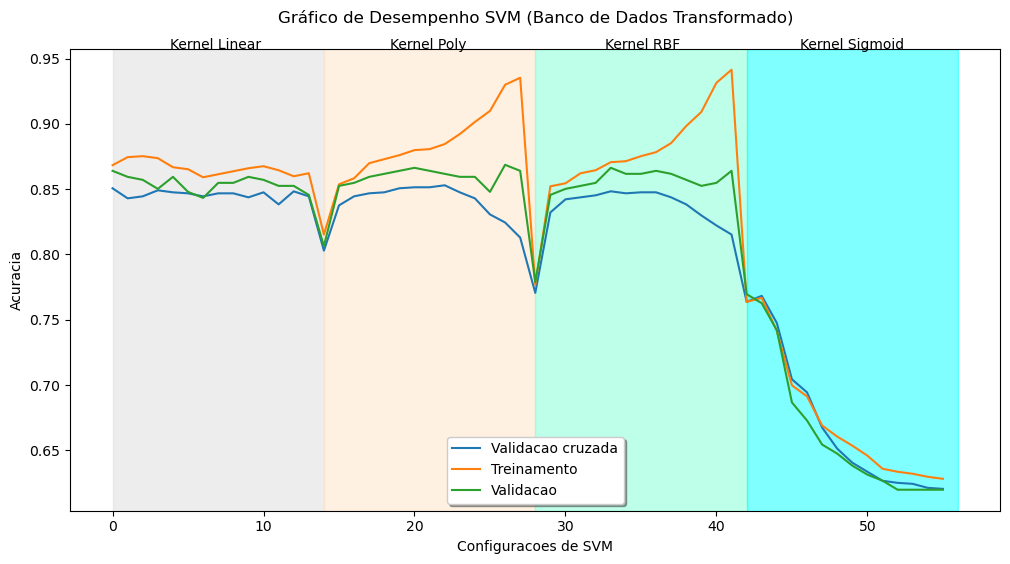


DADOS TRANSFORMADO
Desempenho da melhor configuracao testada:
Kernel: poly
Acuracia de treinamento clf: 0.8838
Acuracia de validacao clf: 0.8571
Acuracia de teste clf: 0.8270
Precision clf: 0.6931
Recall clf: 0.5036
F1 clf: 0.5833
AUC-ROC clf: 0.8152


In [198]:
# Ajustando o tamanho do gráfico
plt.figure(figsize=(12, 6))
# Apresentando todas as configuracoes testadas
plt.plot(list(range(0,len(k_scores_cross))), k_scores_cross)
plt.plot(list(range(0,len(k_scores_train))), k_scores_train)
plt.plot(list(range(0,len(k_scores_valid))), k_scores_valid)
plt.axvspan(0, len(c_range), color='gainsboro', alpha=0.5)
plt.axvspan(len(c_range), 2*len(c_range), color='bisque', alpha=0.5)
plt.axvspan(2*len(c_range), 3*len(c_range), color='aquamarine', alpha=0.5)
plt.axvspan(3*len(c_range), 4*len(c_range), color='cyan', alpha=0.5)
plt.annotate('Kernel Linear',xy=(170, 515), xycoords='figure pixels')
plt.annotate('Kernel Poly',xy=(390, 515), xycoords='figure pixels')
plt.annotate('Kernel RBF',xy=(605, 515), xycoords='figure pixels')
plt.annotate('Kernel Sigmoid',xy=(800, 515), xycoords='figure pixels')
# plt.annotate(st_out, xy=(720, 460), xycoords='figure pixels',xytext=(-40, -70), textcoords='offset points',
#         arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-95"))

plt.legend(('Validacao cruzada', 'Treinamento', 'Validacao'),
           loc='lower center', shadow=True)
plt.xlabel('Configuracoes de SVM')
plt.ylabel('Acuracia')
plt.title('Gráfico de Desempenho SVM (Banco de Dados Normal)\n')
plt.show()

#desempenho da melhor configuracao
clf = SVC(C=c_range[int(the_best_c)], kernel=kernels_range[the_best_kernel], random_state=10)
clf = CalibratedClassifierCV(clf)
#treinando o classificador com a funcao fit
clf.fit(X_train, y_train)
print('\nDADOS NORMAL')
print("Desempenho da melhor configuracao testada:")
print("Kernel: %s" %  kernels_range[the_best_kernel])
print("Acuracia de treinamento clf: %0.4f" %  clf.score(X_train, y_train))
print("Acuracia de validacao clf: %0.4f" %  clf.score(X_valid, y_valid))
print("Acuracia de teste clf: %0.4f" %  clf.score(X_test, y_test))
print("Precision clf: %0.4f" %  precision_score(y_test, clf.predict(X_test)))
print("Recall clf: %0.4f" %  recall_score(y_test, clf.predict(X_test)))
print("F1 clf: %0.4f" %  f1_score(y_test, clf.predict(X_test)))
print("AUC-ROC clf: %0.4f" %  roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

# Exemplo de resultados da Árvore de Decisão (substitua com seus valores reais)
current_results_svm = {
    "Classificador": "SVM",
    "Kernel": kernels_range[the_best_kernel],
    "Acurácia de Treinamento": clf.score(X_train, y_train),
    "Acurácia de Validação": clf.score(X_valid, y_valid),
    "Acurácia de Teste": clf.score(X_test, y_test),
    "Precision": precision_score(y_test, clf.predict(X_test)),
    "Recall": recall_score(y_test, clf.predict(X_test)),
    "F1": f1_score(y_test, clf.predict(X_test)),
    "AUC-ROC": roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
}

################################### DADOS TRANSFORMADO #################################

# Ajustando o tamanho do gráfico
plt.figure(figsize=(12, 6))
# Apresentando todas as configuracoes testadas
plt.plot(list(range(0,len(k_scores_cross_t))), k_scores_cross_t)
plt.plot(list(range(0,len(k_scores_train_t))), k_scores_train_t)
plt.plot(list(range(0,len(k_scores_valid_t))), k_scores_valid_t)
plt.axvspan(0, len(c_range), color='gainsboro', alpha=0.5)
plt.axvspan(len(c_range), 2*len(c_range), color='bisque', alpha=0.5)
plt.axvspan(2*len(c_range), 3*len(c_range), color='aquamarine', alpha=0.5)
plt.axvspan(3*len(c_range), 4*len(c_range), color='cyan', alpha=0.5)
plt.annotate('Kernel Linear',xy=(170, 515), xycoords='figure pixels')
plt.annotate('Kernel Poly',xy=(390, 515), xycoords='figure pixels')
plt.annotate('Kernel RBF',xy=(605, 515), xycoords='figure pixels')
plt.annotate('Kernel Sigmoid',xy=(800, 515), xycoords='figure pixels')
# plt.annotate(st_out, xy=(720, 460), xycoords='figure pixels',xytext=(-40, -70), textcoords='offset points',
#         arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-95"))

plt.legend(('Validacao cruzada', 'Treinamento', 'Validacao'),
           loc='lower center', shadow=True)
plt.xlabel('Configuracoes de SVM')
plt.ylabel('Acuracia')
plt.title('Gráfico de Desempenho SVM (Banco de Dados Transformado)\n')
plt.show()

#desempenho da melhor configuracao
clf_t = SVC(C=c_range[int(the_best_c_t)], kernel=kernels_range[the_best_kernel_t], random_state=10)
clf_t = CalibratedClassifierCV(clf_t)
#treinando o classificador com a funcao fit
clf_t.fit(Xt_train, y_train)
print('\nDADOS TRANSFORMADO')
print("Desempenho da melhor configuracao testada:")
print("Kernel: %s" %  kernels_range[the_best_kernel_t])
print("Acuracia de treinamento clf: %0.4f" %  clf_t.score(Xt_train, y_train))
print("Acuracia de validacao clf: %0.4f" %  clf_t.score(Xt_valid, y_valid))
print("Acuracia de teste clf: %0.4f" %  clf_t.score(Xt_test, y_test))
print("Precision clf: %0.4f" %  precision_score(y_test, clf_t.predict(Xt_test)))
print("Recall clf: %0.4f" %  recall_score(y_test, clf_t.predict(Xt_test)))
print("F1 clf: %0.4f" %  f1_score(y_test, clf_t.predict(Xt_test)))
print("AUC-ROC clf: %0.4f" %  roc_auc_score(y_test, clf.predict_proba(Xt_test)[:, 1]))

current_results_svm_t = {
    "Classificador": "SVM_t",
    "Kernel": kernels_range[the_best_kernel_t],
    "Acurácia de Treinamento": clf_t.score(Xt_train, y_train),
    "Acurácia de Validação": clf_t.score(Xt_valid, y_valid),
    "Acurácia de Teste": clf_t.score(Xt_test, y_test),
    "Precision": precision_score(y_test, clf_t.predict(Xt_test)),
    "Recall": recall_score(y_test, clf_t.predict(Xt_test)),
    "F1": f1_score(y_test, clf_t.predict(Xt_test)),
    "AUC-ROC": roc_auc_score(y_test, clf_t.predict_proba(Xt_test)[:, 1])
}

# Adicionar os resultados da Árvore de Decisão à lista de resultados
results.append(current_results_svm)
results.append(current_results_svm_t)

Após ajustar o modelo de Support Vector Machine (SVM) e testar diversas configurações de kernels, identificamos que o kernel polinomial (poly) apresentou a melhor acurácia nos dados de validação. Utilizando essa configuração, foi possível avaliar o desempenho do modelo em várias métricas.

Ao avaliar o desempenho, verificamos que o modelo alcançou uma acurácia de aproximadamente 88.38% nos dados de treinamento, 85.71% nos dados de validação e 82.70% nos dados de teste. A precisão do modelo foi de 69.31%, indicando que ele classificou corretamente cerca de 69.31% das instâncias positivas ("renda <= 50k", classe 0). No entanto, o modelo apresentou desafios em termos de recall, especialmente devido ao desbalanceamento dos dados, onde a classe positiva é predominante. O recall foi de 50.36%, significando que cerca de 50% das instâncias positivas foram corretamente identificadas. A média harmônica F1-score, que balanceia precisão e recall, foi de 58.33%.

Adicionalmente, a análise da área sob a curva ROC (AUC-ROC) revelou um valor de 0.8152, indicando um desempenho superior ao de um classificador aleatório.

# Redes Neurais Artificiais (RNA) 

As Redes Neurais Artificiais são modelos inspirados no funcionamento do cérebro humano e são amplamente utilizadas para tarefas de classificação, regressão e detecção de padrões complexos. Uma RNA é composta por camadas de neurônios artificiais, onde cada neurônio recebe entradas, realiza uma operação (geralmente uma soma ponderada seguida por uma função de ativação) e passa a saída para os neurônios da próxima camada. Existem diferentes tipos de RNAs, como perceptrons multicamadas (MLP), redes convolucionais (CNN) e redes recorrentes (RNN). As RNAs são poderosas para modelar relações não lineares e têm sido utilizadas com sucesso em áreas como reconhecimento de imagem e processamento de linguagem natural. No entanto, elas exigem grandes quantidades de dados e poder computacional significativo para treinamento.

## Importando bibliotecas

In [199]:
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning

## Treinando classificador

### Banco de dados normal

In [200]:
k_scores_train = []
k_scores_train_full = []
k_scores_valid = []
act = ['identity', 'logistic', 'tanh', 'relu']

best_accuracy = 0
best_k = 0
best_activation = ''

for a in act:
    train_scores = []
    train_full_scores = []
    valid_scores = []

    for k in range(1,100):
        clf = MLPClassifier(hidden_layer_sizes=(k,), activation=a, random_state=10, early_stopping=True, n_iter_no_change=5)
        scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
        train_scores.append(scores.mean())
        clf.fit(X_train, y_train)
        train_full_scores.append(clf.score(X_train, y_train))
        valid_scores.append(clf.score(X_valid, y_valid))

        if valid_scores[-1] > best_accuracy:
            best_accuracy = valid_scores[-1]
            best_k = k
            best_activation = a
        
    k_scores_train.append(train_scores)
    k_scores_train_full.append(train_full_scores)
    k_scores_valid.append(valid_scores)

### Banco de dados transformado

In [201]:
k_scores_train_t = []
k_scores_train_full_t = []
k_scores_valid_t = []

best_accuracy_t = 0
best_k_t = 0
best_activation_t = a


for a in act:
    train_scores = []
    train_full_scores = []
    valid_scores = []

    for k in range(1,100):
        clf = MLPClassifier(hidden_layer_sizes=(k,), activation=a, random_state=10, early_stopping=True, n_iter_no_change=5)
        scores = cross_val_score(clf, Xt_train, y_train, cv=5, scoring='accuracy')
        train_scores.append(scores.mean())
        clf.fit(Xt_train, y_train)
        train_full_scores.append(clf.score(Xt_train, y_train))
        valid_scores.append(clf.score(Xt_valid, y_valid))
        if valid_scores[-1] > best_accuracy_t:
            best_accuracy_t = valid_scores[-1]
            best_k_t = k
            best_activation_t = a
        
    k_scores_train_t.append(train_scores)
    k_scores_train_full_t.append(train_full_scores)
    k_scores_valid_t.append(valid_scores)

## Apresentando os resultados

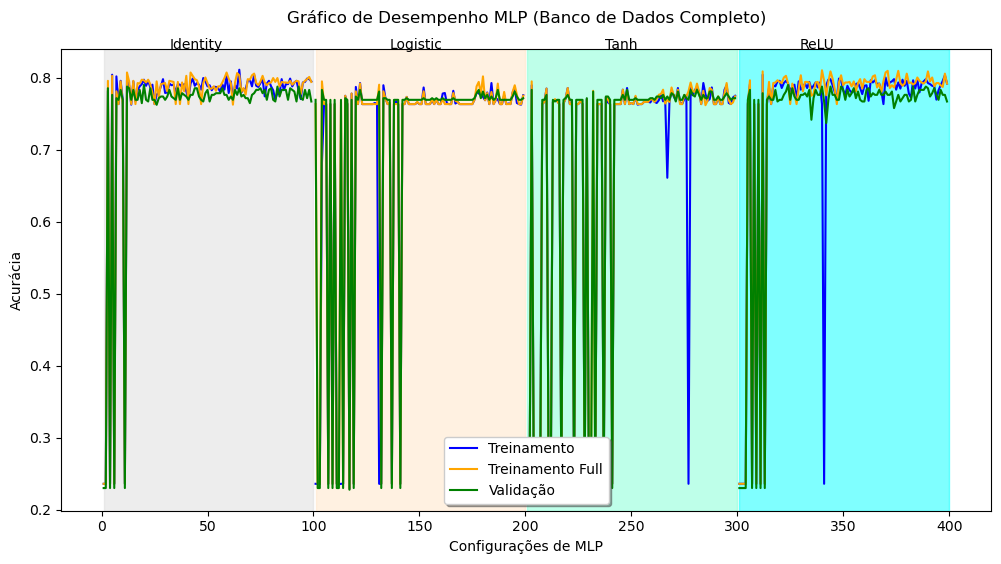

DADOS COMPLETOS
Desempenho da melhor configuração testada:
Ativação: identity
Camadas ocultas: 20
Acurácia de treinamento: 0.7968
Acurácia de validação: 0.7903
Acurácia de teste: 0.7837
Precision: 0.7188
Recall: 0.1655
F1: 0.2690
AUC-ROC: 0.5774


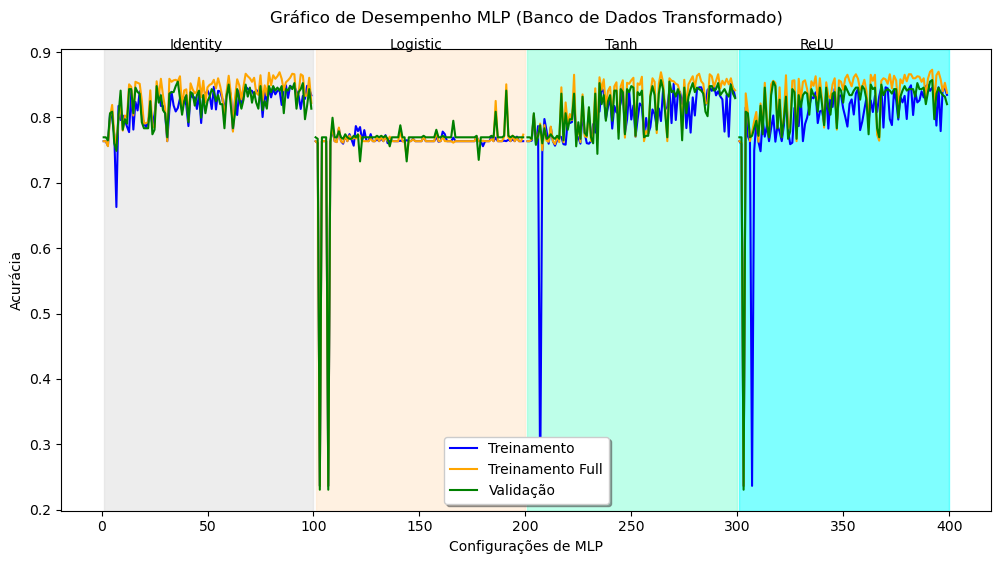


DADOS TRANSFORMADOS
Desempenho da melhor configuração testada:
Ativação: tanh
Camadas ocultas: 64
Acurácia de treinamento: 0.8691
Acurácia de validação: 0.8571
Acurácia de teste: 0.8512
Precision: 0.7154
Recall: 0.6331
F1: 0.6718
AUC-ROC: 0.8928


In [202]:
# Ajustando o tamanho do gráfico
plt.figure(figsize=(12, 6))

# Apresentando todas as configurações testadas
for i, (train, train_full, valid) in enumerate(zip(k_scores_train, k_scores_train_full, k_scores_valid)):
    x = range(i * 100 + 1, (i + 1) * 100)
    plt.plot(x, train, color='blue')
    plt.plot(x, train_full, color='orange')
    plt.plot(x, valid, color='green')

# Cores para os diferentes segmentos de ativação
colors = ['gainsboro', 'bisque', 'aquamarine', 'cyan']
for i, color in enumerate(colors):
    plt.axvspan(i * 100 + 1, (i + 1) * 100, color=color, alpha=0.5)

# Adicionando anotações para as funções de ativação
plt.annotate('Identity', xy=(170, 515), xycoords='figure pixels')
plt.annotate('Logistic', xy=(390, 515), xycoords='figure pixels')
plt.annotate('Tanh', xy=(605, 515), xycoords='figure pixels')
plt.annotate('ReLU', xy=(800, 515), xycoords='figure pixels')

# Ajustes dos eixos e legendas
plt.legend(('Treinamento', 'Treinamento Full', 'Validação'),
           loc='lower center', shadow=True)
plt.xlabel('Configurações de MLP')
plt.ylabel('Acurácia')
plt.title('Gráfico de Desempenho MLP (Banco de Dados Completo)\n')
plt.show()


# Treinar o melhor modelo novamente
best_clf = MLPClassifier(hidden_layer_sizes=(best_k,), activation=best_activation, random_state=10, early_stopping=True, n_iter_no_change=5)
best_clf.fit(X_train, y_train)

# Avaliar o desempenho do banco de dados normal
print('DADOS COMPLETOS')
print('Desempenho da melhor configuração testada:')
print(f'Ativação: {best_activation}')
print(f'Camadas ocultas: {best_k}')
print('Acurácia de treinamento: %0.4f' % best_clf.score(X_train, y_train))
print('Acurácia de validação: %0.4f' % best_clf.score(X_valid, y_valid))
print('Acurácia de teste: %0.4f' % best_clf.score(X_test, y_test))
print('Precision: %0.4f' % precision_score(y_test, best_clf.predict(X_test)))
print('Recall: %0.4f' % recall_score(y_test, best_clf.predict(X_test)))
print('F1: %0.4f' % f1_score(y_test, best_clf.predict(X_test)))
print('AUC-ROC: %0.4f' % roc_auc_score(y_test, best_clf.predict_proba(X_test)[:, 1]))

current_results_rna = {
    "Classificador": "RNA",
    "Ativação": best_activation,
    "Camadas Ocultas": best_k,
    "Acurácia de Treinamento": best_clf.score(X_train, y_train),
    "Acurácia de Validação": best_clf.score(X_valid, y_valid),
    "Acurácia de Teste": best_clf.score(X_test, y_test),
    "Precision": precision_score(y_test, best_clf.predict(X_test)),
    "Recall": recall_score(y_test, best_clf.predict(X_test)),
    "F1": f1_score(y_test, best_clf.predict(X_test)),
    "AUC-ROC": roc_auc_score(y_test, best_clf.predict_proba(X_test)[:, 1])
}

################################### DADOS TRANSFORMADO #################################

# Ajustando o tamanho do gráfico
plt.figure(figsize=(12, 6))

# Apresentando todas as configurações testadas
for i, (train, train_full, valid) in enumerate(zip(k_scores_train_t, k_scores_train_full_t, k_scores_valid_t)):
    x = range(i * 100 + 1, (i + 1) * 100)
    plt.plot(x, train, color='blue')
    plt.plot(x, train_full, color='orange')
    plt.plot(x, valid, color='green')

# Cores para os diferentes segmentos de ativação
colors = ['gainsboro', 'bisque', 'aquamarine', 'cyan']
for i, color in enumerate(colors):
    plt.axvspan(i * 100 + 1, (i + 1) * 100, color=color, alpha=0.5)

# Adicionando anotações para as funções de ativação
plt.annotate('Identity', xy=(170, 515), xycoords='figure pixels')
plt.annotate('Logistic', xy=(390, 515), xycoords='figure pixels')
plt.annotate('Tanh', xy=(605, 515), xycoords='figure pixels')
plt.annotate('ReLU', xy=(800, 515), xycoords='figure pixels')

# Ajustes dos eixos e legendas
plt.legend(('Treinamento', 'Treinamento Full', 'Validação'),
           loc='lower center', shadow=True)
plt.xlabel('Configurações de MLP')
plt.ylabel('Acurácia')
plt.title('Gráfico de Desempenho MLP (Banco de Dados Transformado)\n')
plt.show()

# Treinar o melhor modelo novamente
best_clf_t = MLPClassifier(hidden_layer_sizes=(best_k_t,),activation=best_activation_t, random_state=10, early_stopping=True, n_iter_no_change=5)
best_clf_t.fit(Xt_train, y_train)

# Avaliar o desempenho do banco de dados transformado
print('\nDADOS TRANSFORMADOS')
print('Desempenho da melhor configuração testada:')
print(f'Ativação: {best_activation_t}')
print(f'Camadas ocultas: {best_k_t}')
print('Acurácia de treinamento: %0.4f' % best_clf_t.score(Xt_train, y_train))
print('Acurácia de validação: %0.4f' % best_clf_t.score(Xt_valid, y_valid))
print('Acurácia de teste: %0.4f' % best_clf_t.score(Xt_test, y_test))
print('Precision: %0.4f' % precision_score(y_test, best_clf_t.predict(Xt_test)))
print('Recall: %0.4f' % recall_score(y_test, best_clf_t.predict(Xt_test)))
print('F1: %0.4f' % f1_score(y_test, best_clf_t.predict(Xt_test)))
print('AUC-ROC: %0.4f' % roc_auc_score(y_test, best_clf_t.predict_proba(Xt_test)[:, 1]))

# Resultados da Rede Neural Artificial 
current_results_rna_t = {
    "Classificador": "RNA_t",
    "Ativação": best_activation_t,
    "Camadas Ocultas": best_k_t,
    "Acurácia de Treinamento": best_clf_t.score(Xt_train, y_train),
    "Acurácia de Validação": best_clf_t.score(Xt_valid, y_valid),
    "Acurácia de Teste": best_clf_t.score(Xt_test, y_test),
    "Precision": precision_score(y_test, best_clf_t.predict(Xt_test)),
    "Recall": recall_score(y_test, best_clf_t.predict(Xt_test)),
    "F1": f1_score(y_test, best_clf_t.predict(Xt_test)),
    "AUC-ROC": roc_auc_score(y_test, best_clf_t.predict_proba(Xt_test)[:, 1])
}

# Adicionar os resultados da RNA à lista de resultados
results.append(current_results_rna_t)
results.append(current_results_rna)

Depois de ajustar o modelo de redes neurais e explorar diversas configurações com camadas ocultas variando de 1 a 100 e funções de ativação como identidade, ReLU, logística e tanh, identificamos que a rede neural utilizando os dados trasnformados com função de ativação tahn e 64 camadas ocultas obteve a melhor acurácia nos dados de validação.

Avaliando o desempenho do modelo, observamos que ele alcançou uma acurácia de aproximadamente 86.91% nos dados de treinamento, 85.71% nos dados de validação e 85.12% nos dados de teste. A precisão do modelo foi de 71.54%, indicando que ele acertou aproximadamente 71.54% das classificações positivas que seria "renda <= 50k" (classe 0). No entanto, o recall revelou que o modelo enfrenta desafios, especialmente devido ao desbalanceamento dos dados, onde a classe positiva é predominante. O recall foi de 63.31%, o que significa que apriximadamente 63% das instâncias positivas foram corretamente identificadas. A média harmônica F1-score, que equilibra precisão e recall foi de 67,18%.

Além disso, a análise da área sob a curva ROC (AUC-ROC) resultou em 0.8928, indicando um desempenho superior a um classificador aleatório.

# Random Forest (RF)

O Random Forest é um modelo de aprendizado em conjunto que combina várias Árvores de Decisão para melhorar a precisão e reduzir o risco de sobreajuste. Ele opera construindo múltiplas árvores de decisão durante o treinamento e outputando a classe que é o modo das classes (classificação) ou média das previsões (regressão) das árvores individuais. Cada árvore no Random Forest é construída a partir de uma amostra aleatória do conjunto de dados e considera apenas um subconjunto aleatório dos atributos para dividir os nós. Isso introduz diversidade entre as árvores e ajuda a prevenir o sobreajuste. O Random Forest é robusto, eficiente e capaz de lidar com grandes conjuntos de dados e muitas características.

## Importando bibliotecas

In [203]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

## Treinando o classificador

### Banco de dados normal

In [204]:
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [233]:
y_pred = rf.predict(X_test)

In [206]:
accuracy = accuracy_score(y_test, y_pred)

In [207]:
param_dist = {'n_estimators': randint(50,1000),
              'max_depth': randint(1,1000)}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=10)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5, random_state=10)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f9da0a17b50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f9d7755c290>},
                   random_state=10)

In [208]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

In [234]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [210]:
rf = RandomForestClassifier(random_state=10)
rf.fit(Xt_train, y_train)

RandomForestClassifier(random_state=10)

In [212]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

### Banco de dados transformado

In [237]:
rf_t = RandomForestClassifier(random_state=10)
rf_t.fit(Xt_train, y_train)

RandomForestClassifier(random_state=10)

In [238]:
y_pred = rf_t.predict(Xt_test)

In [239]:
accuracy_t = accuracy_score(y_test, y_pred)

In [216]:
# Create a random forest classifier
rf_t = RandomForestClassifier(random_state=10)

# Use random search to find the best hyperparameters
rand_search_t = RandomizedSearchCV(rf_t, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5, random_state=10)

# Fit the random search object to the data
rand_search_t.fit(Xt_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f9da0a17b50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f9d7755c290>},
                   random_state=10)

In [217]:
# Create a variable for the best model
best_rf_t = rand_search_t.best_estimator_

In [240]:
accuracy_t = accuracy_score(y_test, y_pred)
precision_t = precision_score(y_test, y_pred)
recall_t = recall_score(y_test, y_pred)

## Apresentando os resultados

In [241]:
print("\nDADOS NORMAL")
print("Desempenho da melhor configuração testada:")
# Previsões no conjunto de treinamento
y_train_pred = best_rf.predict(X_train)

# Previsões no conjunto de teste
y_val_pred = best_rf.predict(X_test)

print('Melhores Hiperparâmetros:',  rand_search.best_params_)

# Acurácia de Treinamento
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Acurácia de Treinamento:", train_accuracy)

# Acurácia de Validação
val_accuracy = accuracy_score(y_test, y_val_pred)
print("Acurácia de Validação:", val_accuracy)

#
print("Precisão:", precision)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_val_pred)
print("F1 Score:", f1)

# AUC-ROC Score
y_val_proba = best_rf.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_val_proba)
print("AUC-ROC Score:", auc_roc)

current_results_rf = {
    "Classificador": "RF",
    "Acurácia de Treinamento": train_accuracy,
    "Acurácia de Validação": val_accuracy,
    "Acurácia de Teste": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1": f1,
    "AUC-ROC": auc_roc,
}

################################### DADOS TRANSFORMADO #################################

print("\nDADOS TRANSFORMADO")
print("Desempenho da melhor configuração testada:")
# Previsões no conjunto de treinamento
y_train_pred_t = best_rf_t.predict(Xt_train)

# Previsões no conjunto de teste
y_val_pred = best_rf_t.predict(Xt_test)

print('Melhores Hiperparâmetros:',  rand_search_t.best_params_)

# Acurácia de Treinamento
train_accuracy_t = accuracy_score(y_train, y_train_pred_t)
print("Acurácia de Treinamento:", train_accuracy_t)

# Acurácia de Validação
val_accuracy_t = accuracy_score(y_test, y_val_pred)
print("Acurácia de Validação:", val_accuracy_t)

print("Precisão:", precision_t)
print("Recall:", recall_t)

# F1 Score
f1_t = f1_score(y_test, y_val_pred)
print("F1 Score:", f1)

# AUC-ROC Score
y_val_proba = best_rf_t.predict_proba(Xt_test)[:, 1]
auc_roc_t = roc_auc_score(y_test, y_val_proba)
print("AUC-ROC Score:", auc_roc)

current_results_rf_t = {
    "Classificador": "RF_t",
    "Acurácia de Treinamento": train_accuracy_t,
    "Acurácia de Validação": val_accuracy_t,
    "Acurácia de Teste": accuracy_t,
    "Precision": precision_t,
    "Recall": recall_t,
    "F1": f1_t,
    "AUC-ROC": auc_roc_t,
}


# Adicionar os resultados do Random Forest à lista de resultados
results.append(current_results_rf)
results.append(current_results_rf_t)


DADOS NORMAL
Desempenho da melhor configuração testada:
Melhores Hiperparâmetros: {'max_depth': 266, 'n_estimators': 175}
Acurácia de Treinamento: 1.0
Acurácia de Validação: 0.8633217993079585
Precisão: 0.578125
Recall: 0.5323741007194245
F1 Score: 0.6775510204081633
AUC-ROC Score: 0.9005260484095639

DADOS TRANSFORMADO
Desempenho da melhor configuração testada:
Melhores Hiperparâmetros: {'max_depth': 266, 'n_estimators': 175}
Acurácia de Treinamento: 1.0
Acurácia de Validação: 0.8650519031141869
Precisão: 0.7924528301886793
Recall: 0.60431654676259
F1 Score: 0.6775510204081633
AUC-ROC Score: 0.9005260484095639


Após ajustar o modelo de Random Forest (RF) utilizando os dados transformado e testar diversas configurações, identificamos os melhores hiperparâmetros: uma profundidade máxima de 266 e 175 estimadores (árvores). Com essa configuração, avaliamos o desempenho do modelo em várias métricas.

Ao analisar os resultados, observamos que o modelo alcançou uma acurácia perfeita de 1.0 nos dados de treinamento, indicando um ajuste completo aos dados de treinamento, poderiamos ficar com um pé atras pensando que seria um possível overfiting, entretando a acurácia de validação nos informa que o modelo foi capaz de generalizar. Nos dados de validação, a acurácia foi de aproximadamente 86.50%. O F1-score, que balanceia precisão e recall, foi de 68.29%, refletindo uma boa performance na classificação das instâncias positivas.

Além disso, a análise da área sob a curva ROC (AUC-ROC) resultou em um valor de 0.9008, indicando que o modelo tem um excelente desempenho na distinção entre as classes, superando significativamente um classificador aleatório.

# Stacking Generalizarion (SG)

O Stacking Generalization, ou simplesmente Stacking, é uma técnica de aprendizado em conjunto que combina as predições de múltiplos modelos base para melhorar o desempenho preditivo. A ideia é treinar um metamodelo para aprender a melhor maneira de combinar as previsões dos modelos base. O processo envolve duas camadas: a camada base, onde diferentes modelos (como SVMs, RNAs, Árvores de Decisão, etc.) são treinados no conjunto de dados original, e a camada de nível superior (ou metanível), onde um metamodelo (geralmente uma regressão linear ou outro modelo simples) é treinado nas predições dos modelos base. O Stacking pode capturar padrões que outros métodos de combinação, como bagging e boosting, podem não detectar, resultando em melhores previsões.

## Importando bibliotecas

In [220]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

## Treinando o classificador

### Banco de dados normal

In [ ]:
# Construindo os classificadores base
# Logistic Regression: Serve como baseline.
# Random Forest: Captura interações complexas.
# Gradient Boosting: Oferece alto desempenho em muitos casos.
base_learners = [
    ('lr', LogisticRegression(max_iter=1000, random_state=10)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=10)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=10))
]

# Criando o modelo meta-aprendiz
meta_learner = LogisticRegression(random_state=10)

# Criando o classificador de empilhamento
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

# Definindo o espaço de busca para o GridSearchCV
param_grid = {
    'rf__n_estimators': [10, 50, 100],
    'rf__max_depth': [None, 10, 20],
    'gb__n_estimators': [50, 100, 200],
    'gb__learning_rate': [0.01, 0.1, 0.2]
}

# Executando a busca pelos melhores parâmetros
grid_search = GridSearchCV(stacking_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Melhor configuração encontrada
best_clf = grid_search.best_estimator_

# Avaliando a performance do melhor classificador
y_train_pred = best_clf.predict(X_train)
y_valid_pred = best_clf.predict(X_valid)
y_test_pred = best_clf.predict(X_test)

y_train_prob = best_clf.predict_proba(X_train)[:, 1]
y_valid_prob = best_clf.predict_proba(X_valid)[:, 1]
y_test_prob = best_clf.predict_proba(X_test)[:, 1]

### Banco de dados transformado

In [ ]:
# Executando a busca pelos melhores parâmetros
grid_search_t = GridSearchCV(stacking_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_t.fit(Xt_train, y_train)

# Melhor configuração encontrada
best_clf_t = grid_search_t.best_estimator_

# Avaliando a performance do melhor classificador
y_train_pred_t = best_clf_t.predict(Xt_train)
y_valid_pred_t = best_clf_t.predict(Xt_valid)
y_test_pred_t = best_clf_t.predict(Xt_test)

y_train_prob_t = best_clf_t.predict_proba(Xt_train)[:, 1]
y_valid_prob_t = best_clf_t.predict_proba(Xt_valid)[:, 1]
y_test_prob_t = best_clf_t.predict_proba(Xt_test)[:, 1]

## Apresentando os resultados

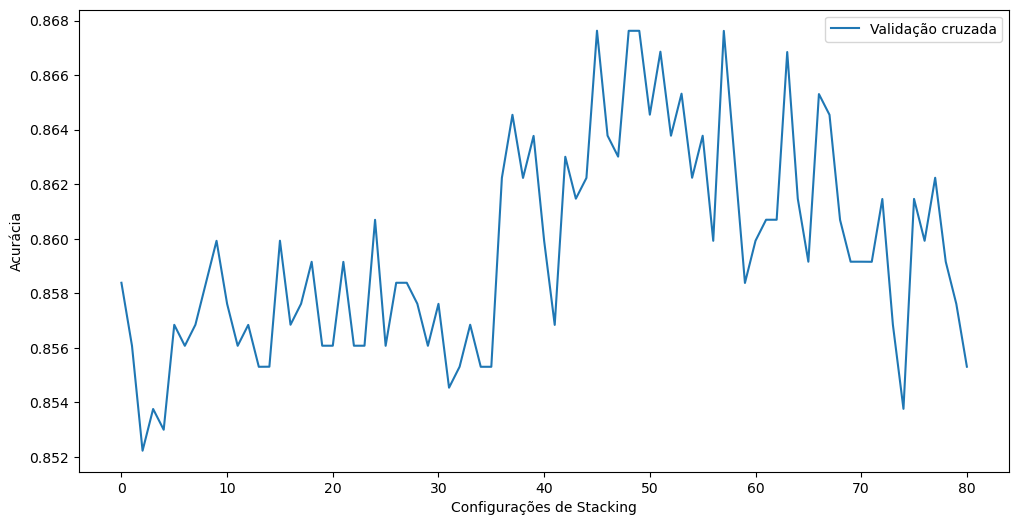


DADOS NORMAL
Desempenho da melhor configuração testada:
Acuracia de treinamento: 0.9361
Acuracia de validação: 0.8756
Acuracia de teste: 0.8564
Precision: 0.7456
Recall: 0.6115
F1: 0.6719
AUC-ROC: 0.9119


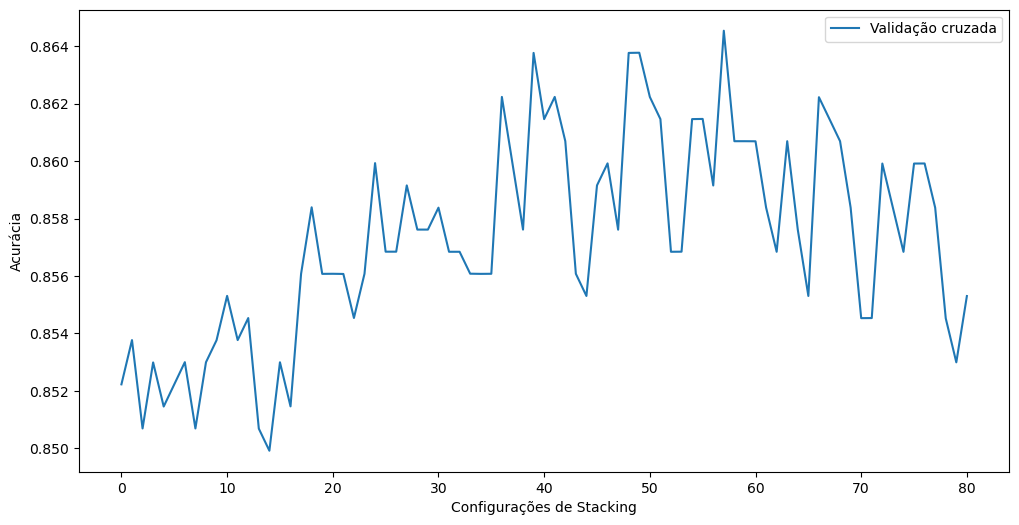


DADOS TRANSFORMADO
Desempenho da melhor configuração testada:
Acuracia de treinamento: 0.9061
Acuracia de validação: 0.8710
Acuracia de teste: 0.8599
Precision: 0.7589
Recall: 0.6115
F1: 0.6773
AUC-ROC: 0.9110


In [227]:
# Plotando os resultados
results_plt = grid_search.cv_results_

plt.figure(figsize=(12, 6))
plt.plot(results_plt['mean_test_score'], label='Validação cruzada')
plt.xlabel('Configurações de Stacking')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

print('\nDADOS NORMAL')
print("Desempenho da melhor configuração testada:")
print("Acuracia de treinamento: %0.4f" % best_clf.score(X_train, y_train))
print("Acuracia de validação: %0.4f" % best_clf.score(X_valid, y_valid))
print("Acuracia de teste: %0.4f" % best_clf.score(X_test, y_test))
print("Precision: %0.4f" % precision_score(y_test, y_test_pred))
print("Recall: %0.4f" % recall_score(y_test, y_test_pred))
print("F1: %0.4f" % f1_score(y_test, y_test_pred))
print("AUC-ROC: %0.4f" % roc_auc_score(y_test, y_test_prob))


# Resultados do Stochastic Gradient (SG)
current_results_sg = {
    "Classificador": "SG",
    "Acurácia de Treinamento": best_clf.score(X_train, y_train),
    "Acurácia de Validação": best_clf.score(X_valid, y_valid),
    "Acurácia de Teste": best_clf.score(X_test, y_test),
    "Precision": precision_score(y_test, y_test_pred),
    "Recall": recall_score(y_test, y_test_pred),
    "F1": f1_score(y_test, y_test_pred),
    "AUC-ROC": roc_auc_score(y_test, y_test_prob)
}

################################### DADOS TRANSFORMADO #################################

# Plotando os resultados
results_plt_t = grid_search_t.cv_results_

plt.figure(figsize=(12, 6))
plt.plot(results_plt_t['mean_test_score'], label='Validação cruzada')
plt.xlabel('Configurações de Stacking')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

print('\nDADOS TRANSFORMADO')
print("Desempenho da melhor configuração testada:")
print("Acuracia de treinamento: %0.4f" % best_clf_t.score(Xt_train, y_train))
print("Acuracia de validação: %0.4f" % best_clf_t.score(Xt_valid, y_valid))
print("Acuracia de teste: %0.4f" % best_clf_t.score(Xt_test, y_test))
print("Precision: %0.4f" % precision_score(y_test, y_test_pred_t))
print("Recall: %0.4f" % recall_score(y_test, y_test_pred_t))
print("F1: %0.4f" % f1_score(y_test, y_test_pred_t))
print("AUC-ROC: %0.4f" % roc_auc_score(y_test, y_test_prob_t))


current_results_sg_t = {
    "Classificador": "SG_t",
    "Acurácia de Treinamento": best_clf_t.score(Xt_train, y_train),
    "Acurácia de Validação": best_clf_t.score(Xt_valid, y_valid),
    "Acurácia de Teste": best_clf_t.score(Xt_test, y_test),
    "Precision": precision_score(y_test, y_test_pred_t),
    "Recall": recall_score(y_test, y_test_pred_t),
    "F1": f1_score(y_test, y_test_pred_t),
    "AUC-ROC": roc_auc_score(y_test, y_test_prob_t)
}

# Adicionar os resultados do SG à lista de resultados
results.append(current_results_sg)
results.append(current_results_sg_t)

Após ajustar o modelo de Stacking Generalization (SG) utilizando os dados normais e explorar várias configurações, identificamos a melhor configuração em termos de desempenho nos dados de validação. Utilizando essa configuração, avaliamos o modelo em diversas métricas.

Ao analisar o desempenho, observamos que o modelo alcançou uma acurácia de aproximadamente 93.61% nos dados de treinamento, 87.56% nos dados de validação e 85.64% nos dados de teste. A precisão do modelo foi de 74.56%, indicando que ele classificou corretamente 7.565 a cada 10.000 observações dentro das instâncias positivas. No entanto, o modelo enfrentou desafios em termos de recall, especialmente devido ao desbalanceamento dos dados, onde a classe positiva é predominante. O recall foi de 61.15%, o que significa que aproximadamente 61.15% das instâncias positivas foram corretamente identificadas. A média harmônica F1-score, que balanceia precisão e recall, foi de 67.19%.

Adicionalmente, a análise da área sob a curva ROC (AUC-ROC) resultou em um valor de 0.9119, indicando um desempenho superior ao de um classificador aleatório.

# Comparando os indicadores dos classificadores (resultados)

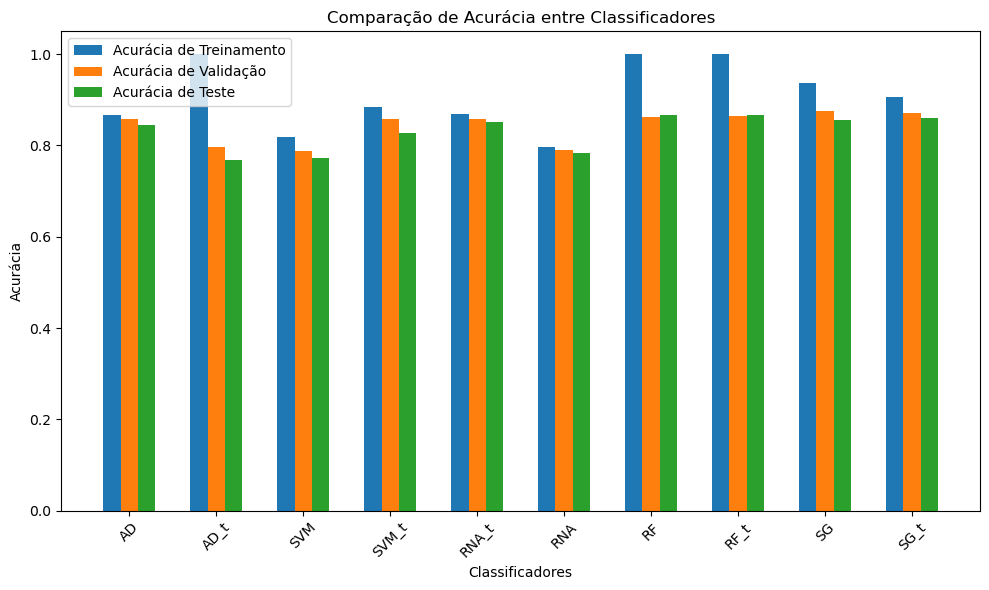

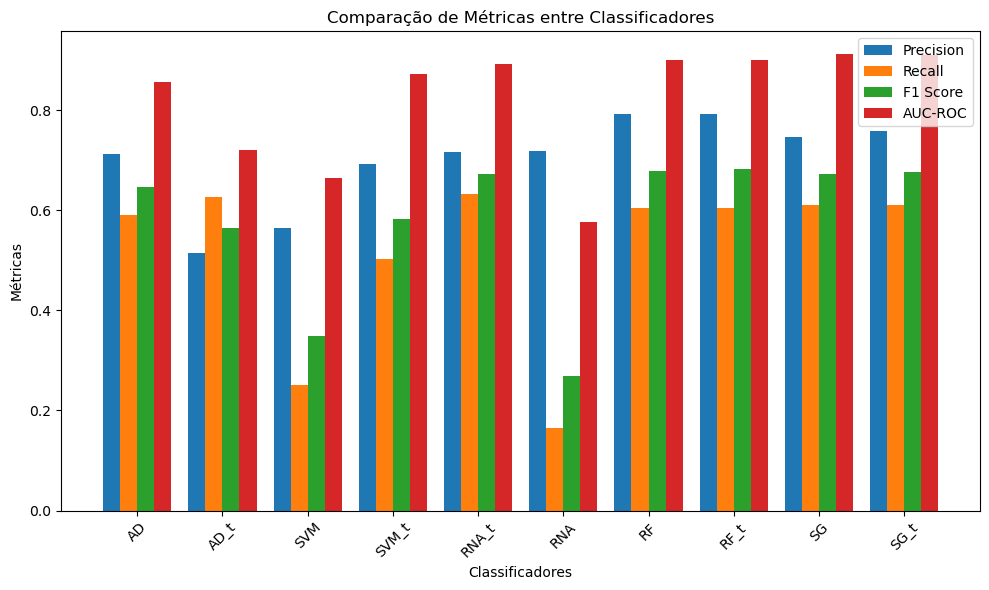

In [228]:
# Definindo os classificadores e as métricas
classificadores = [result["Classificador"] for result in results]
acuracias_treinamento = [result["Acurácia de Treinamento"] for result in results]
acuracias_validacao = [result["Acurácia de Validação"] for result in results]
acuracias_teste = [result["Acurácia de Teste"] for result in results]
precisions = [result["Precision"] for result in results]
recalls = [result["Recall"] for result in results]
f1_scores = [result["F1"] for result in results]
auc_rocs = [result["AUC-ROC"] for result in results]

# Configurando a posição dos gráficos
x = np.arange(len(classificadores))

# Largura das barras
width = 0.2

# Plotando as acurácias
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, acuracias_treinamento, width, label='Acurácia de Treinamento')
ax.bar(x, acuracias_validacao, width, label='Acurácia de Validação')
ax.bar(x + width, acuracias_teste, width, label='Acurácia de Teste')

# Adicionando labels e título
ax.set_xlabel('Classificadores')
ax.set_ylabel('Acurácia')
ax.set_title('Comparação de Acurácia entre Classificadores')
ax.set_xticks(x)
ax.set_xticklabels(classificadores)
ax.legend()

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotando Precision, Recall, F1 e AUC-ROC
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width*1.5, precisions, width, label='Precision')
ax.bar(x - width/2, recalls, width, label='Recall')
ax.bar(x + width/2, f1_scores, width, label='F1 Score')
ax.bar(x + width*1.5, auc_rocs, width, label='AUC-ROC')

# Adicionando labels e título
ax.set_xlabel('Classificadores')
ax.set_ylabel('Métricas')
ax.set_title('Comparação de Métricas entre Classificadores')
ax.set_xticks(x)
ax.set_xticklabels(classificadores)
ax.legend()

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Ao finalizar a análise de todos os modelos, observamos que a transformação do banco de dados resultou em melhorias significativas nos modelos SVM e RNA, os quais se ajustaram melhor a dados com distribuição mais próxima da normal. Por outro lado, o modelo de Árvore de Decisão (AD) apresentou um desempenho inferior quando utilizado com o banco de dados transformado, devido à sua menor adaptação às mudanças nas características dos dados após a transformação.

Devido à alta presença de outliers e à alta dimensionalidade dos dados, modelos mais robustos como RNA, RF e SG demonstraram as melhores estatísticas.

Para selecionar o melhor modelo, é crucial considerar o que se deseja otimizar. Se o objetivo é identificar corretamente a maioria das pessoas com renda inferior a 50 mil, o modelo com melhor recall deve ser priorizado, pois essa métrica calcula a proporção de observações da classe positiva corretamente classificadas em relação a todas as observações da classe positiva (True Positive + False Negative). Por outro lado, se a meta é obter uma classificação precisa para ambas as classes, a acurácia do modelo deve ser considerada com mais peso.

Levando em conta a escolha do modelo com melhor desempenho nos dados de validação e uma boa classificação para a classe positiva, o modelo mais adequado é a RNA com função de ativação tangente hiperbólica (tanh), 64 camadas ocultas e utilizando os dados transformados. Este modelo alcançou uma acurácia de 0,8571 e um recall de 0,6331.

# Fluxograma

In [224]:
from graphviz import Digraph
from PIL import Image

In [242]:
# Cria um novo objeto Digraph (direcionado)
dot = Digraph(comment='Fluxograma de Processamento de Dados e Modelagem')

# Adiciona nós
dot.node('A', 'Importação do banco de dados')
dot.node('B', 'Banco de dados normal (X)')
dot.node('C', 'Análise exploratória das variáveis explicativas e resposta')
dot.node('D', 'Se a variável for categórica:')
dot.node('E', 'Verificar se ⊂ a classe "?"')
dot.node('F', 'Remover as observações ⊂ a classe "?"')
dot.node('G', 'Não faz nada')
dot.node('H', 'Transformação para melhorar a distribuição dos dados')
dot.node('I', 'Banco de dados transformado (Xt)')
dot.node('J', 'Criação de uma amostra de 5% para usar nos modelos')
dot.node('K', 'Separação dos dados em treinamento, validação e teste')
dot.node('L', 'Criação dos modelos')
dot.node('M', 'Ajuste do modelo de Árvore de Decisão (AD)')
dot.node('N', 'Ajuste do modelo de Suport Vector Machine (SVM)')
dot.node('O', 'Ajuste do modelo de Rede Neural Artificial (RNA)')
dot.node('P', 'Ajuste do modelo de Random Forest (RF)')
dot.node('Q', 'Stacking Generalization (SG)')
dot.node('R', 'Explicação das métricas dos modelos')
dot.node('S', 'Conclusão')


# Adiciona arestas
dot.edges(['AB', 'AC', 'CD', 'DE'])
dot.edge('E', 'F', label='Sim')
dot.edge('E', 'G', label='Não')
dot.edge('D', 'H', label='Se não for categórica')
dot.edges(['FI','GI','HI', 'IJ', 'BJ', 'JK','KL','LM', 'LN', 'LO','LP', 'LQ','MR', 'NR','OR','PR','QR','RS'])


# Salva o fluxograma em um arquivo .gv e renderiza em formato PNG
dot.render('fluxograma_processamento_modelagem.gv', format='png')

# Carrega a imagem renderizada e exibe
imagem = Image.open('fluxograma_processamento_modelagem.gv.png')


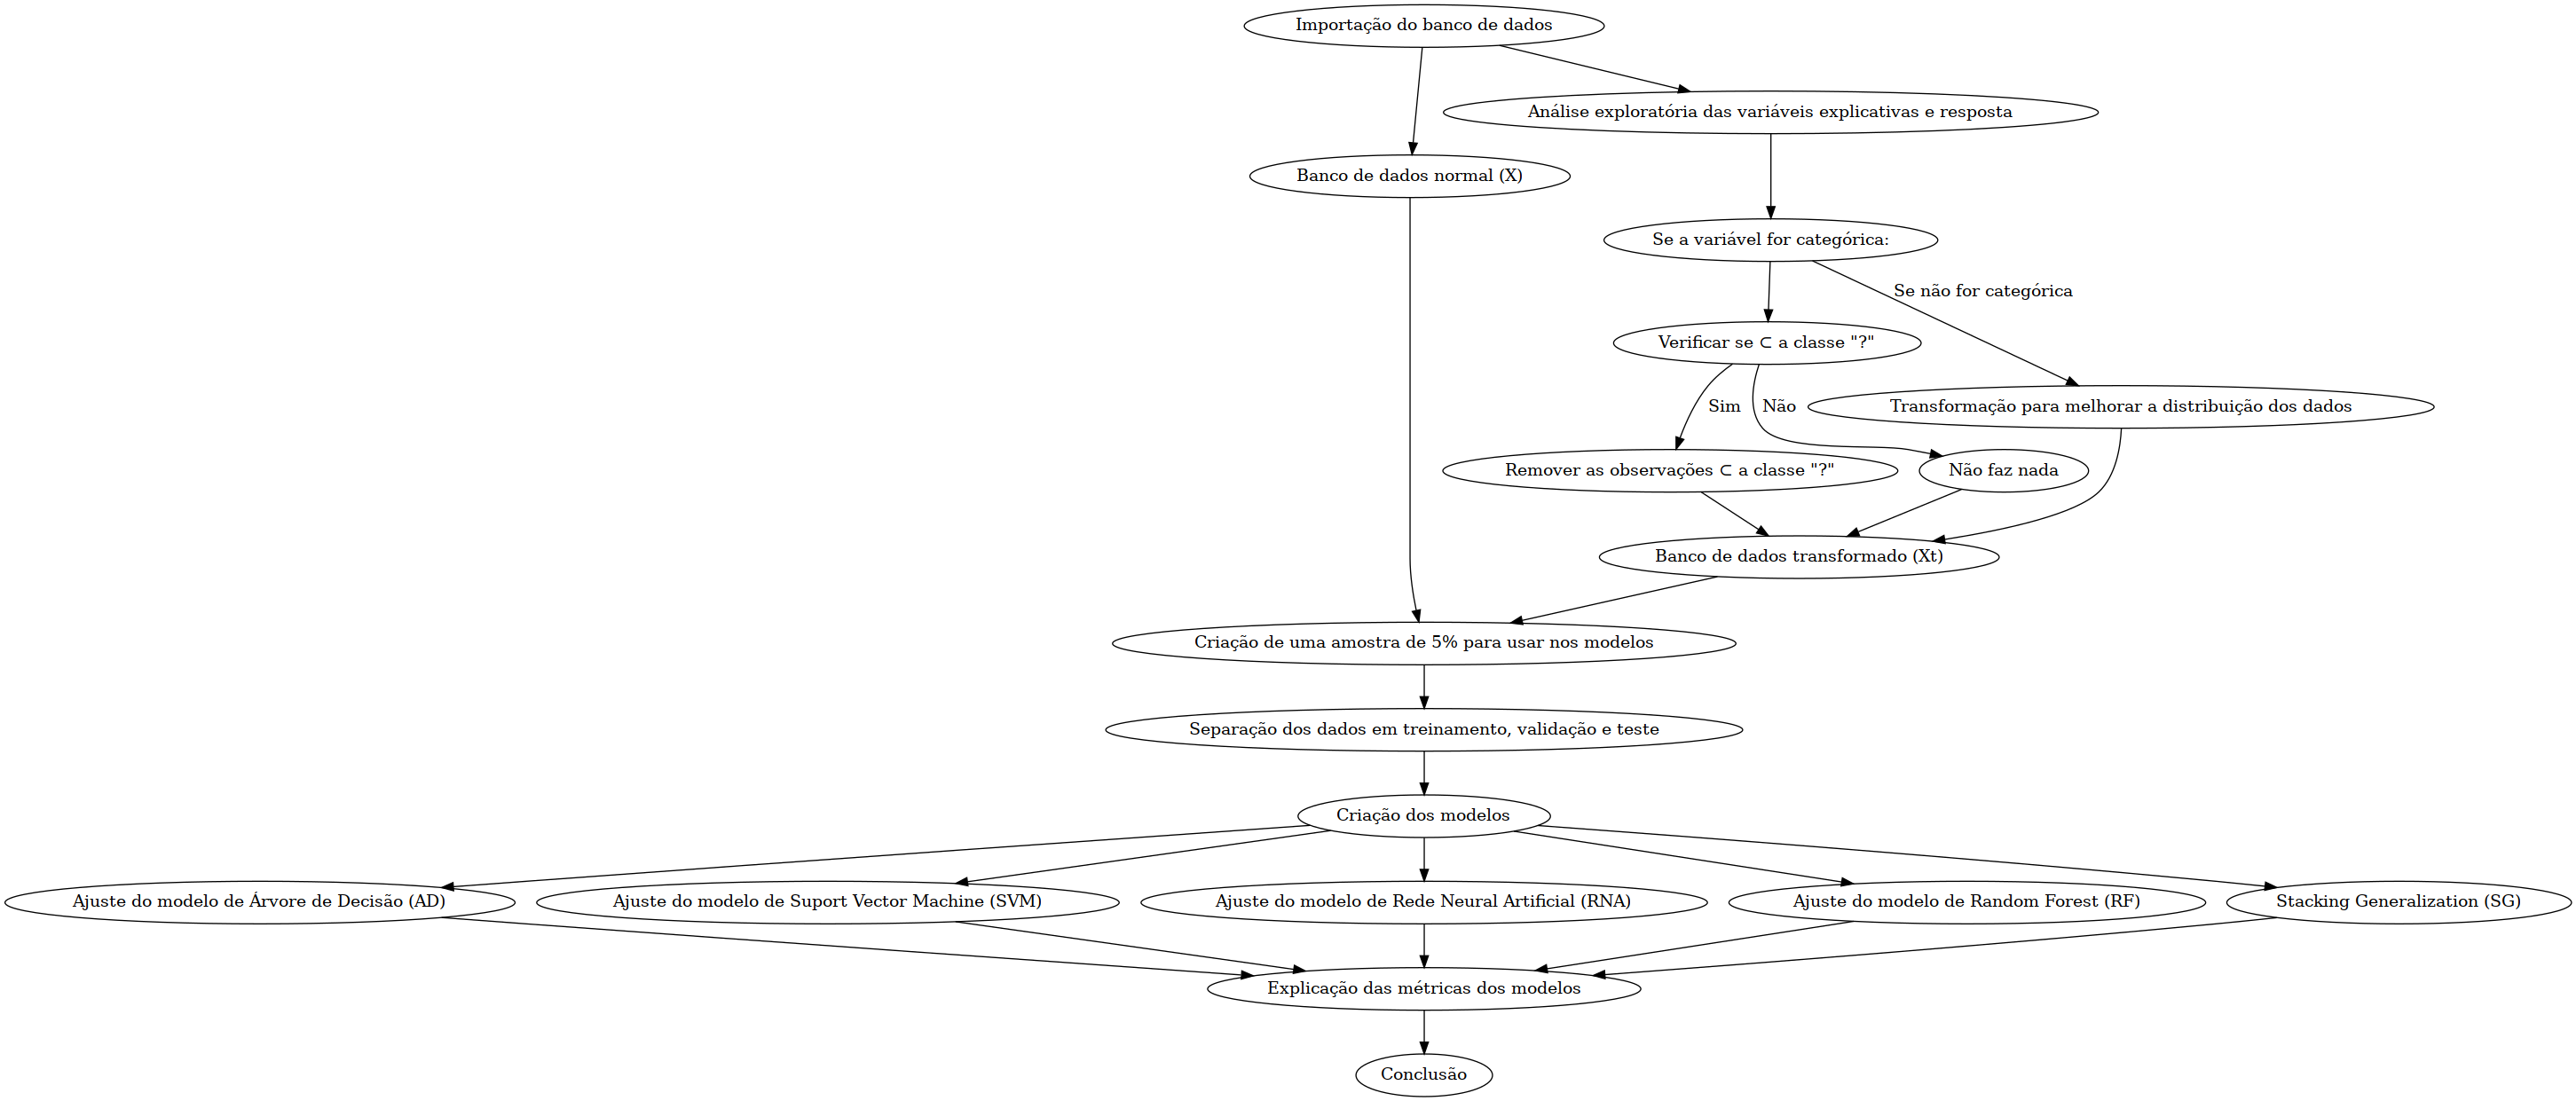